<a href="https://colab.research.google.com/github/Edimosphy/DERPIn-Hackathon--Track-3/blob/main/DERPin_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Hackathon Challenge Track 3: Inclusive Nutrition Policies Nutrition & Hidden Hunger Insights: Ghana (*case study*)**

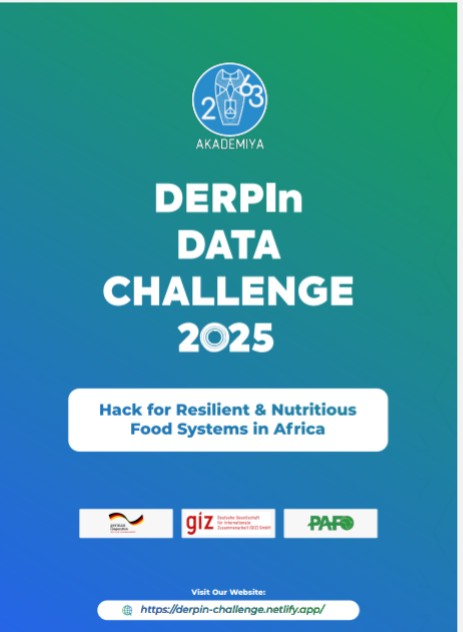

##**Step 1: Information About Track 3**

**1. Background**

Policymakers and community leaders often lack applications that:
- Identify where nutrient gaps exist.
- Prioritize the most vulnerable populations.
- Simulate the impact of interventions.
- Present results clearly for diverse stakeholders.
By turning DERPIn's nutrient adequacy data into practical guidance, decision-makers can craft inclusive, targeted nutrition policies.

Data Sources:
1. AGWAA API Documentation: https://www.aagwa.org/docs/derpin-api.html
AGWAA API Documentation specific to the DERPIn countries.
Country Specific Portals.
2. Food System Crisis Observatory and Response (FS-COR) Platform
3. Any other open nutrition or agricultural datasets relevant to the problem.

**2. Main Objective**
1. Build Al-driven tools to predict nutrition gaps.
2. Display predictions in mobile apps or interactive dashboards to guide policy and community action.

**3. The Challenge**
- Gather nutrient adequacy data from AGWAA, FS-COR, or other reliable sources.
- Develop models that predict where and in which groups nutrient gaps are most severe.
- Allow simulation of intervention impacts (e.g., supplementation programs, dietary changes).
- Build interfaces that present the results clearly to policymakers, NGOs, and communities.

**4. Deliverables**
1. Prediction Model for nutrient gaps.
2. App/Dashboard to visualize results and simulate interventions.
3. Documentation explaining data sources, methods, and usage.


**Getting Started:**
1. Study the AGWAA and FS-COR datasets for nutrient adequacy indicators.
2. Choose statistical or machine learning techniques to predict gaps.
3. Implement simulation features to test possible interventions.
4. Build clear, easy-to-use visualizations and summaries.
5. Validate predictions against known ground-truth or survey data where possible.

**Final Output Expectation**

By the end of the challenge, each team should have:
- A predictive model that identifies nutrient gaps.
- An app or dashboard presenting these insights and intervention simulations.
- Documentation detailing your methodology and sources.

In [ ]:
##Import urllib.request to access the files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

plt.style.use("ggplot")


##**Step 2: Track 3 Report Statement-Identifying Nutrient Gaps in Ghana (2022 Case Study)**

**Objective:** To build a prediction model to identify nutrient gaps in Ghana, focusing on the year 2022, to inform targeted nutrition policies and community actions.

**Data Sources:** The analysis will leverage data from multiple sources, including:
*   Ghana Food Security and Nutrition Indicators (FAOSTAT, HDX) - `ghana_food_price_FAO`
*   AGWAA API Documentation- Ghana (2022) - `aagwa_data_prod_2022` via publication dataset
*   Food System Crisis Observatory and Response (FS-COR) Platform - `Ghana_nutrient_dataset`

**Methodology:**
1.  **Data Collection and Integration:** Gather the specified datasets for the year 2022 and merge them based on regional alignment using the FS-COR platform's structure.
2.  **Data Preprocessing:** Clean, preprocess, and transform the integrated dataset to handle missing values, inconsistencies, and prepare it for analysis.
3.  **Exploratory Data Analysis (EDA):** Conduct EDA to understand the relationships between variables and identify key patterns.
4.  **Model Development:** Build a predictive model using statistical or machine learning techniques to predict the Mean Nutrient Adequacy Ratio Index, serving as the target variable to identify nutrient gaps.
5.  **Feature Importance Analysis:** Analyze feature importance to understand the impact of factors such as climate conditions, food price, and crop production on nutrient adequacy.
6.  **Model Evaluation:** Evaluate the developed model's performance.
7.  **Intervention Simulation:** Implement features to simulate the potential impact of interventions on nutrient gaps.
8.  **Visualization and Reporting:** Develop an app or dashboard to visualize the results, intervention simulations, and key insights for policymakers, NGOs, and communities.

**Expected Outcome:** A predictive model and an interactive visualization tool that can effectively identify areas and populations in Ghana most vulnerable to nutrient deficiencies, providing actionable insights for developing inclusive and targeted nutrition policies.

##**Step 3: Data Loading, Understanding of Data, Merging and Data Preprocessing**

###**Data Loading and Profiling**

####**AGWAA API**

In [ ]:
#Loading of AGWAA API Documentation
aagwa_data= pd.read_csv("/content/drive/MyDrive/Deep Tech Challenge /aagwa_data_prod_2022.csv")
aagwa_data.head()

Region  Maize(mt)  Rice(mt)  Sorghum(mt)  Cassava(mt)  Millet(mt)
0  Brong Ahafo      76462     27890            0            0           0
1      Ashanti      35684     13589          107       314125           0
2  Brong Ahafo     108573     15865          217       314811           0
3  Brong Ahafo     166014     14271            0       392435           0
4      Central      66710     13101            0       323087           0

In [ ]:
#Checking the shape
print("Rows = {} and Columns = {}".format(aagwa_data.shape[0],aagwa_data.shape[1]))


Rows = 16 and Columns = 6


In [ ]:
#Check data info
aagwa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Region       16 non-null     object
 1   Maize(mt)    16 non-null     int64 
 2   Rice(mt)     16 non-null     int64 
 3   Sorghum(mt)  16 non-null     int64 
 4   Cassava(mt)  16 non-null     int64 
 5   Millet(mt)   16 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 900.0+ bytes


####**Food System Crisis Observatory and Response (FS-COR) Platform**

In [ ]:
from os import fsdecode
#Loading the FS-COR dataset
fs_cor_data= pd.read_csv("/content/drive/MyDrive/Deep Tech Challenge /Ghana_nutrient_dataset.csv")
fs_cor_data.head()

Category          Region  Mean Nutrient Adequacy Ratio Index  \
0         0         Ashanti                              0.3577   
1         1     Brong Ahafo                              0.2121   
2         2         Central                              0.0324   
3         3         Eastern                              0.0000   
4         4  Greatest Accra                              0.2092   

   Per Capita Food Consumption Index  Avg_kcalories  Avg_ca(mg)  \
0                             0.7515          46.39       77.39   
1                             0.5116          52.76       76.61   
2                             0.6838          50.12       83.57   
3                             0.6806          51.70       86.57   
4                             1.0000          45.28       81.24   

   Avg_folate(mcg)  Avg_iron(mg)  Avg_niacin(mg)  Avg_riboflavin(mg)  \
0            48.61         50.32           54.35               44.24   
1            54.96         57.41           57.94               44.45   
2            49.51         55.05           60.96               50.12   
3            52.30         59.76           58.40               50.89   
4            49.59         49.61           56.34               48.27   

   Avg_thiamin(mg)  Avg_vitA(mcg)  Avg_VitB12(mcg)  Avg_VitB6(mg)  \
0            34.76          72.60            72.27          50.19   
1            41.70          66.58            63.49          58.70   
2            39.59          85.80            86.73          51.20   
3            41.23          83.85            83.20          55.06   
4            36.84          79.45            83.82          52.33   

   Avg_zinc(mg)  Vulnerability to Climate Change Index  
0         40.10                                 0.4090  
1         46.40                                 0.6320  
2         48.08                                 0.0266  
3         44.27                                 0.4412  
4         40.36                                 0.3183

In [ ]:
#Check the shape
print("The shape of the dataset is: ", fs_cor_data.shape)

The shape of the dataset is:  (10, 16)


In [ ]:
#Check for data info
fs_cor_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Category                               10 non-null     int64  
 1   Region                                 10 non-null     object 
 2   Mean Nutrient Adequacy Ratio Index     10 non-null     float64
 3   Per Capita Food Consumption Index      10 non-null     float64
 4   Avg_kcalories                          10 non-null     float64
 5   Avg_ca(mg)                             10 non-null     float64
 6   Avg_folate(mcg)                        10 non-null     float64
 7   Avg_iron(mg)                           10 non-null     float64
 8   Avg_niacin(mg)                         10 non-null     float64
 9   Avg_riboflavin(mg)                     10 non-null     float64
 10  Avg_thiamin(mg)                        10 non-null     float64
 11  Avg_vitA(

In [ ]:
#Check the columns name
fs_cor_data.columns

Index(['Category', 'Region', 'Mean Nutrient Adequacy Ratio Index',
       'Per Capita Food Consumption Index', 'Avg_kcalories', 'Avg_ca(mg)',
       'Avg_folate(mcg)', 'Avg_iron(mg)', 'Avg_niacin(mg)',
       'Avg_riboflavin(mg)', 'Avg_thiamin(mg)', 'Avg_vitA(mcg)',
       'Avg_VitB12(mcg)', 'Avg_VitB6(mg)', 'Avg_zinc(mg)',
       'Vulnerability to Climate Change Index'],
      dtype='object')

**Insight**

The following columns name will be changed to handle name format
- Mean Nutrient Adequacy Ratio Index to MNARI
- Per Capita Food Consumption Index to PCFCI
- Vulnerability to Climate Change Index to VCCI

In [ ]:
#Rename the above name
fs_cor_data.rename(columns={"Mean Nutrient Adequacy Ratio Index":"MNARI",
                            "Per Capita Food Consumption Index":"PCFCI",
                            "Vulnerability to Climate Change Index":"VCCI"}, inplace=True)
#Display
fs_cor_data.head()

Category          Region   MNARI   PCFCI  Avg_kcalories  Avg_ca(mg)  \
0         0         Ashanti  0.3577  0.7515          46.39       77.39   
1         1     Brong Ahafo  0.2121  0.5116          52.76       76.61   
2         2         Central  0.0324  0.6838          50.12       83.57   
3         3         Eastern  0.0000  0.6806          51.70       86.57   
4         4  Greatest Accra  0.2092  1.0000          45.28       81.24   

   Avg_folate(mcg)  Avg_iron(mg)  Avg_niacin(mg)  Avg_riboflavin(mg)  \
0            48.61         50.32           54.35               44.24   
1            54.96         57.41           57.94               44.45   
2            49.51         55.05           60.96               50.12   
3            52.30         59.76           58.40               50.89   
4            49.59         49.61           56.34               48.27   

   Avg_thiamin(mg)  Avg_vitA(mcg)  Avg_VitB12(mcg)  Avg_VitB6(mg)  \
0            34.76          72.60            72.27          50.19   
1            41.70          66.58            63.49          58.70   
2            39.59          85.80            86.73          51.20   
3            41.23          83.85            83.20          55.06   
4            36.84          79.45            83.82          52.33   

   Avg_zinc(mg)    VCCI  
0         40.10  0.4090  
1         46.40  0.6320  
2         48.08  0.0266  
3         44.27  0.4412  
4         40.36  0.3183

####**Other Relevant Data Sources**
This was gotten from
- Ghana Food Security and Nutrition Indicators (FAOSTAT, HDX) - ghana_food_price_FAO

In [ ]:
#Step 1:Loading of ghana_food_price_FAO
food_price= pd.read_csv("/content/ghana_food_price FAO")
food_price.head()

Unnamed: 0       Region     commodity  price
0           1      Ashanti       Cassava  10.31
1           2      Ashanti       Sorghum  38.25
2           3  Brong Ahafo         Maize  16.15
3           4  Brong Ahafo        Millet  32.50
4           5  Brong Ahafo  Rice (Local)  21.56

In [ ]:
#Check the shape
print(f"the shape of the dataset is: {food_price.shape}")

the shape of the dataset is: (25769, 4)


In [ ]:
#Check the info
food_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25769 entries, 0 to 25768
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  25769 non-null  int64  
 1   Region      25769 non-null  object 
 2   commodity   25769 non-null  object 
 3   price       25769 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 805.4+ KB


In [ ]:
#Drop the Unnamed column
food_price.drop("Unnamed: 0", axis=1, inplace=True)

#Recheck the info
food_price.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25769 entries, 0 to 25768
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Region     25769 non-null  object 
 1   commodity  25769 non-null  object 
 2   price      25769 non-null  float64
dtypes: float64(1), object(2)
memory usage: 604.1+ KB


In [ ]:
#Rename commodity to Commodity for  consistency
food_price.rename(columns={"commodity":"Commodity"}, inplace=True)

#Check the info
food_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25769 entries, 0 to 25768
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Region     25769 non-null  object 
 1   Commodity  25769 non-null  object 
 2   price      25769 non-null  float64
dtypes: float64(1), object(2)
memory usage: 604.1+ KB


### Merging Datasets

In [ ]:
#Step 1: Merging fs_cor_data and aagwa_data
#On region
merged_data= pd.merge(fs_cor_data, aagwa_data, on="Region")
merged_data.head()

Category       Region   MNARI   PCFCI  Avg_kcalories  Avg_ca(mg)  \
0         0      Ashanti  0.3577  0.7515          46.39       77.39   
1         1  Brong Ahafo  0.2121  0.5116          52.76       76.61   
2         1  Brong Ahafo  0.2121  0.5116          52.76       76.61   
3         1  Brong Ahafo  0.2121  0.5116          52.76       76.61   
4         2      Central  0.0324  0.6838          50.12       83.57   

   Avg_folate(mcg)  Avg_iron(mg)  Avg_niacin(mg)  Avg_riboflavin(mg)  ...  \
0            48.61         50.32           54.35               44.24  ...   
1            54.96         57.41           57.94               44.45  ...   
2            54.96         57.41           57.94               44.45  ...   
3            54.96         57.41           57.94               44.45  ...   
4            49.51         55.05           60.96               50.12  ...   

   Avg_vitA(mcg)  Avg_VitB12(mcg)  Avg_VitB6(mg)  Avg_zinc(mg)    VCCI  \
0          72.60            72.27          50.19         40.10  0.4090   
1          66.58            63.49          58.70         46.40  0.6320   
2          66.58            63.49          58.70         46.40  0.6320   
3          66.58            63.49          58.70         46.40  0.6320   
4          85.80            86.73          51.20         48.08  0.0266   

   Maize(mt)  Rice(mt)  Sorghum(mt)  Cassava(mt)  Millet(mt)  
0      35684     13589          107       314125           0  
1      76462     27890            0            0           0  
2     108573     15865          217       314811           0  
3     166014     14271            0       392435           0  
4      66710     13101            0       323087           0  

[5 rows x 21 columns]

In [ ]:
#Step 2: Merged to food_price
merged_data= pd.merge(merged_data, food_price, on="Region")
merged_data.head()

Category   Region   MNARI   PCFCI  Avg_kcalories  Avg_ca(mg)  \
0         0  Ashanti  0.3577  0.7515          46.39       77.39   
1         0  Ashanti  0.3577  0.7515          46.39       77.39   
2         0  Ashanti  0.3577  0.7515          46.39       77.39   
3         0  Ashanti  0.3577  0.7515          46.39       77.39   
4         0  Ashanti  0.3577  0.7515          46.39       77.39   

   Avg_folate(mcg)  Avg_iron(mg)  Avg_niacin(mg)  Avg_riboflavin(mg)  ...  \
0            48.61         50.32           54.35               44.24  ...   
1            48.61         50.32           54.35               44.24  ...   
2            48.61         50.32           54.35               44.24  ...   
3            48.61         50.32           54.35               44.24  ...   
4            48.61         50.32           54.35               44.24  ...   

   Avg_VitB6(mg)  Avg_zinc(mg)   VCCI  Maize(mt)  Rice(mt)  Sorghum(mt)  \
0          50.19          40.1  0.409      35684     13589          107   
1          50.19          40.1  0.409      35684     13589          107   
2          50.19          40.1  0.409      35684     13589          107   
3          50.19          40.1  0.409      35684     13589          107   
4          50.19          40.1  0.409      35684     13589          107   

   Cassava(mt)  Millet(mt)     Commodity  price  
0       314125           0       Cassava  10.31  
1       314125           0       Sorghum  38.25  
2       314125           0       Cassava  11.00  
3       314125           0         Maize  21.75  
4       314125           0  Rice (Local)  33.63  

[5 rows x 23 columns]

###**Data Cleaning and Preprocessing**

In [ ]:
#Rename the merged to nutrient_gap
nutrient_gap= merged_data

In [ ]:
#View the head
nutrient_gap.sample(10)

Category       Region   MNARI   PCFCI  Avg_kcalories  Avg_ca(mg)  \
37263         8        Volta  0.0853  0.3692          54.54       78.02   
13788         1  Brong Ahafo  0.2121  0.5116          52.76       76.61   
30505         6   Upper East  0.9297  0.0805          45.19       59.46   
26842         5     Northern  0.6756  0.2220          50.42       58.64   
33952         8        Volta  0.0853  0.3692          54.54       78.02   
26650         5     Northern  0.6756  0.2220          50.42       58.64   
3471          0      Ashanti  0.3577  0.7515          46.39       77.39   
35946         8        Volta  0.0853  0.3692          54.54       78.02   
17202         1  Brong Ahafo  0.2121  0.5116          52.76       76.61   
7434          1  Brong Ahafo  0.2121  0.5116          52.76       76.61   

       Avg_folate(mcg)  Avg_iron(mg)  Avg_niacin(mg)  Avg_riboflavin(mg)  ...  \
37263            58.82         58.73           58.84               45.86  ...   
13788            54.96         57.41           57.94               44.45  ...   
30505            51.64         60.77           49.15               40.14  ...   
26842            54.90         54.44           55.05               39.55  ...   
33952            58.82         58.73           58.84               45.86  ...   
26650            54.90         54.44           55.05               39.55  ...   
3471             48.61         50.32           54.35               44.24  ...   
35946            58.82         58.73           58.84               45.86  ...   
17202            54.96         57.41           57.94               44.45  ...   
7434             54.96         57.41           57.94               44.45  ...   

       Avg_VitB6(mg)  Avg_zinc(mg)    VCCI  Maize(mt)  Rice(mt)  Sorghum(mt)  \
37263          53.13         44.17  0.5922     143419     26871            0   
13788          58.70         46.40  0.6320     108573     15865          217   
30505          39.80         41.10  0.5920      13775     18821       114493   
26842          46.74         42.11  1.0000     168128    107474       103444   
33952          53.13         44.17  0.5922      49163     13010            0   
26650          46.74         42.11  1.0000     168128    107474       103444   
3471           50.19         40.10  0.4090      35684     13589          107   
35946          53.13         44.17  0.5922     143419     26871            0   
17202          58.70         46.40  0.6320     166014     14271            0   
7434           58.70         46.40  0.6320      76462     27890            0   

       Cassava(mt)  Millet(mt)           Commodity   price  
37263      1478175           0                 Yam  850.00  
13788       314811           0              Onions    5.55  
30505       115450      174624               Maize  117.00  
26842       489240      105156             Sorghum    3.08  
33952       244247           0        Rice (Local)    5.02  
26650       489240      105156      Meat (Chicken)    1.75  
3471        314125           0     Peppers (Fresh)    1.41  
35946      1478175           0  Plantains (Apentu)    3.35  
17202       392435           0      Meat (Chicken)  428.61  
7434             0           0                Gari  292.58  

[10 rows x 23 columns]

In [ ]:
#Check the data info
nutrient_gap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40818 entries, 0 to 40817
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Category            40818 non-null  int64  
 1   Region              40818 non-null  object 
 2   MNARI               40818 non-null  float64
 3   PCFCI               40818 non-null  float64
 4   Avg_kcalories       40818 non-null  float64
 5   Avg_ca(mg)          40818 non-null  float64
 6   Avg_folate(mcg)     40818 non-null  float64
 7   Avg_iron(mg)        40818 non-null  float64
 8   Avg_niacin(mg)      40818 non-null  float64
 9   Avg_riboflavin(mg)  40818 non-null  float64
 10  Avg_thiamin(mg)     40818 non-null  float64
 11  Avg_vitA(mcg)       40818 non-null  float64
 12  Avg_VitB12(mcg)     40818 non-null  float64
 13  Avg_VitB6(mg)       40818 non-null  float64
 14  Avg_zinc(mg)        40818 non-null  float64
 15  VCCI                40818 non-null  float64
 16  Maiz

In [ ]:
#Checking for missing value
nutrient_gap.isna().sum()

Category              0
Region                0
MNARI                 0
PCFCI                 0
Avg_kcalories         0
Avg_ca(mg)            0
Avg_folate(mcg)       0
Avg_iron(mg)          0
Avg_niacin(mg)        0
Avg_riboflavin(mg)    0
Avg_thiamin(mg)       0
Avg_vitA(mcg)         0
Avg_VitB12(mcg)       0
Avg_VitB6(mg)         0
Avg_zinc(mg)          0
VCCI                  0
Maize(mt)             0
Rice(mt)              0
Sorghum(mt)           0
Cassava(mt)           0
Millet(mt)            0
Commodity             0
price                 0
dtype: int64

In [ ]:
#Check for duplicates
nutrient_gap.duplicated().sum()

np.int64(12113)

In [ ]:
#Remove duplicates
nutrient_gap.drop_duplicates(inplace= True)
print("There is {} duplicates in the dataset".format(nutrient_gap.duplicated().sum()))


There is 0 duplicates in the dataset


In [ ]:
#Recheck the shape of the dataset after merging and cleaning
nutrient_gap.shape
print("Total number of rows is {} and total number of columns is {}".format(nutrient_gap.shape[0], nutrient_gap.shape[1]))

Total number of rows is 28705 and total number of columns is 23


In [ ]:
#Renaming the columns name to handle inconsistencies
nutrient_gap.columns

Index(['Category', 'Region', 'MNARI', 'PCFCI', 'Avg_kcalories', 'Avg_ca(mg)',
       'Avg_folate(mcg)', 'Avg_iron(mg)', 'Avg_niacin(mg)',
       'Avg_riboflavin(mg)', 'Avg_thiamin(mg)', 'Avg_vitA(mcg)',
       'Avg_VitB12(mcg)', 'Avg_VitB6(mg)', 'Avg_zinc(mg)', 'VCCI', 'Maize(mt)',
       'Rice(mt)', 'Sorghum(mt)', 'Cassava(mt)', 'Millet(mt)', 'Commodity',
       'price'],
      dtype='object')

In [ ]:
#Rename
nutrient_gap.columns= nutrient_gap.columns.str.lower()
nutrient_gap.columns

Index(['category', 'region', 'mnari', 'pcfci', 'avg_kcalories', 'avg_ca(mg)',
       'avg_folate(mcg)', 'avg_iron(mg)', 'avg_niacin(mg)',
       'avg_riboflavin(mg)', 'avg_thiamin(mg)', 'avg_vita(mcg)',
       'avg_vitb12(mcg)', 'avg_vitb6(mg)', 'avg_zinc(mg)', 'vcci', 'maize(mt)',
       'rice(mt)', 'sorghum(mt)', 'cassava(mt)', 'millet(mt)', 'commodity',
       'price'],
      dtype='object')

In [ ]:
#View sample
nutrient_gap.sample(5)

category       region   mnari   pcfci  avg_kcalories  avg_ca(mg)  \
10041         1  Brong Ahafo  0.2121  0.5116          52.76       76.61   
38412         9      Western  0.3370  0.5444          47.78       77.96   
9002          1  Brong Ahafo  0.2121  0.5116          52.76       76.61   
23370         5     Northern  0.6756  0.2220          50.42       58.64   
33461         8        Volta  0.0853  0.3692          54.54       78.02   

       avg_folate(mcg)  avg_iron(mg)  avg_niacin(mg)  avg_riboflavin(mg)  ...  \
10041            54.96         57.41           57.94               44.45  ...   
38412            42.91         53.55           56.17               49.56  ...   
9002             54.96         57.41           57.94               44.45  ...   
23370            54.90         54.44           55.05               39.55  ...   
33461            58.82         58.73           58.84               45.86  ...   

       avg_vitb6(mg)  avg_zinc(mg)    vcci  maize(mt)  rice(mt)  sorghum(mt)  \
10041          58.70         46.40  0.6320     108573     15865          217   
38412          50.74         42.39  0.0000      89675    138343            0   
9002           58.70         46.40  0.6320      76462     27890            0   
23370          46.74         42.11  1.0000          0      1356        19208   
33461          53.13         44.17  0.5922      49163     13010            0   

       cassava(mt)  millet(mt)               commodity   price  
10041       314811           0                     Yam  500.00  
38412      1922543           0  Fish (Mackerel, Fresh)    5.85  
9002             0           0              Yam (Puna)   15.11  
23370            0        1663                    Eggs  111.43  
33461       244247           0                   Maize   48.00  

[5 rows x 23 columns]

In [ ]:
#Recheck the data info
nutrient_gap.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28705 entries, 0 to 40816
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   category            28705 non-null  int64  
 1   region              28705 non-null  object 
 2   mnari               28705 non-null  float64
 3   pcfci               28705 non-null  float64
 4   avg_kcalories       28705 non-null  float64
 5   avg_ca(mg)          28705 non-null  float64
 6   avg_folate(mcg)     28705 non-null  float64
 7   avg_iron(mg)        28705 non-null  float64
 8   avg_niacin(mg)      28705 non-null  float64
 9   avg_riboflavin(mg)  28705 non-null  float64
 10  avg_thiamin(mg)     28705 non-null  float64
 11  avg_vita(mcg)       28705 non-null  float64
 12  avg_vitb12(mcg)     28705 non-null  float64
 13  avg_vitb6(mg)       28705 non-null  float64
 14  avg_zinc(mg)        28705 non-null  float64
 15  vcci                28705 non-null  float64
 16  maize(mt)

**Insight**
- All the datasets were merged and a final dataset was assigned as nutrient_gap.
- The mean nutrient adequacy ratio index (mnari) will be the target variable of this dataset as it has potential to identify the most vulnerable region in Ghana that have severe nutrient gap.
- After proper merging and cleaning, it was discovered there was no missing values but duplicates of 12113. This was dropped to handle the duplicates.
- The dataset has the following data types:float64(15), int64(6), object(2).
- The final shape of the dataset which will be subjected to EDA and model building is 28705 rows and is 23 columns.
- The dataset columns was handled to a uniform format to handle inconsistencies.

**Recommendation**
- The final dataset will be analysed for futher exploration and checking of relationship between the assigned target and features variables.
- Outliers will be checked and addressed proper to handle much noise.
- Features selection and features engineering will be used to have a more optimal results.
- Hypertuning will be explored during model building.


##**Step 4: Exploratory Data Analysis (EDA)**

In [ ]:
#Check the summary descriptive
nutrient_gap.describe().T

count           mean            std      min  \
category            28705.0       3.599826       3.139668     0.00   
mnari               28705.0       0.339694       0.264583     0.00   
pcfci               28705.0       0.455507       0.192805     0.00   
avg_kcalories       28705.0      50.825668       2.715333    45.19   
avg_ca(mg)          28705.0      73.106009       9.306659    45.96   
avg_folate(mcg)     28705.0      52.914230       4.293198    42.91   
avg_iron(mg)        28705.0      55.982874       2.746195    50.32   
avg_niacin(mg)      28705.0      56.629212       2.631744    49.15   
avg_riboflavin(mg)  28705.0      44.357210       3.614832    35.24   
avg_thiamin(mg)     28705.0      42.039929       4.254656    34.76   
avg_vita(mcg)       28705.0      65.567451      13.703385    32.91   
avg_vitb12(mcg)     28705.0      60.582108      16.340862    20.58   
avg_vitb6(mg)       28705.0      52.686778       5.725673    39.80   
avg_zinc(mg)        28705.0      44.054344       2.619075    38.27   
vcci                28705.0       0.566126       0.295985     0.00   
maize(mt)           28705.0   92361.636788   56142.504453     0.00   
rice(mt)            28705.0   35979.814980   38795.362069  1356.00   
sorghum(mt)         28705.0   17239.932033   38829.997597     0.00   
cassava(mt)         28705.0  432951.254485  494987.300599     0.00   
millet(mt)          28705.0   19444.732695   50922.478140     0.00   
price               28705.0     135.020835     225.162694     0.32   

                            25%          50%          75%           max  
category                 1.0000       2.0000       6.0000  9.000000e+00  
mnari                    0.2121       0.2121       0.3577  1.000000e+00  
pcfci                    0.3692       0.5116       0.5444  7.515000e-01  
avg_kcalories           49.4700      51.7000      52.7600  5.454000e+01  
avg_ca(mg)              76.6100      76.6100      77.9600  8.657000e+01  
avg_folate(mcg)         49.5100      54.9000      54.9600  5.882000e+01  
avg_iron(mg)            54.4400      57.4100      57.4100  6.077000e+01  
avg_niacin(mg)          55.0500      57.9400      57.9400  6.096000e+01  
avg_riboflavin(mg)      44.2400      44.4500      45.8600  5.089000e+01  
avg_thiamin(mg)         39.5900      41.7000      46.5000  4.815000e+01  
avg_vita(mcg)           66.5800      66.5800      76.3200  8.580000e+01  
avg_vitb12(mcg)         63.2000      63.4900      72.2700  8.673000e+01  
avg_vitb6(mg)           50.1900      53.1300      58.7000  5.870000e+01  
avg_zinc(mg)            42.1100      44.1700      46.4000  4.808000e+01  
vcci                     0.4090       0.6320       0.6320  1.000000e+00  
maize(mt)            49163.0000   89675.0000  143419.0000  2.135060e+05  
rice(mt)             13589.0000   15865.0000   35777.0000  1.383430e+05  
sorghum(mt)              0.0000       0.0000     217.0000  1.341100e+05  
cassava(mt)         115450.0000  314811.0000  392435.0000  1.922543e+06  
millet(mt)               0.0000       0.0000       0.0000  1.746240e+05  
price                    5.1400      35.7500     180.1900  4.114550e+03

**Insight**
- Based on the analysis, there seems to be slight outlier in some columns.
- There is high outliers in price, rice, sorghum, maize, cassava.

**Recommendation**
- Further exploration will be carried out via visualization to analyse the impact of outliers.
- Proper handling will be done to address the much extreme values through capping in order to optimize the model performance while maintaining the necessary information.


###**Checking for Outliers via Visualization**

In [ ]:
#First separate the dataset into numerical and categorical variables
num_col = nutrient_gap.select_dtypes(include=np.number)
cat_col = nutrient_gap.select_dtypes(exclude=np.number)

In [ ]:
#Print the output
print(num_col.columns)

Index(['category', 'mnari', 'pcfci', 'avg_kcalories', 'avg_ca(mg)',
       'avg_folate(mcg)', 'avg_iron(mg)', 'avg_niacin(mg)',
       'avg_riboflavin(mg)', 'avg_thiamin(mg)', 'avg_vita(mcg)',
       'avg_vitb12(mcg)', 'avg_vitb6(mg)', 'avg_zinc(mg)', 'vcci', 'maize(mt)',
       'rice(mt)', 'sorghum(mt)', 'cassava(mt)', 'millet(mt)', 'price'],
      dtype='object')


In [ ]:
print(cat_col.columns)

Index(['region', 'commodity'], dtype='object')


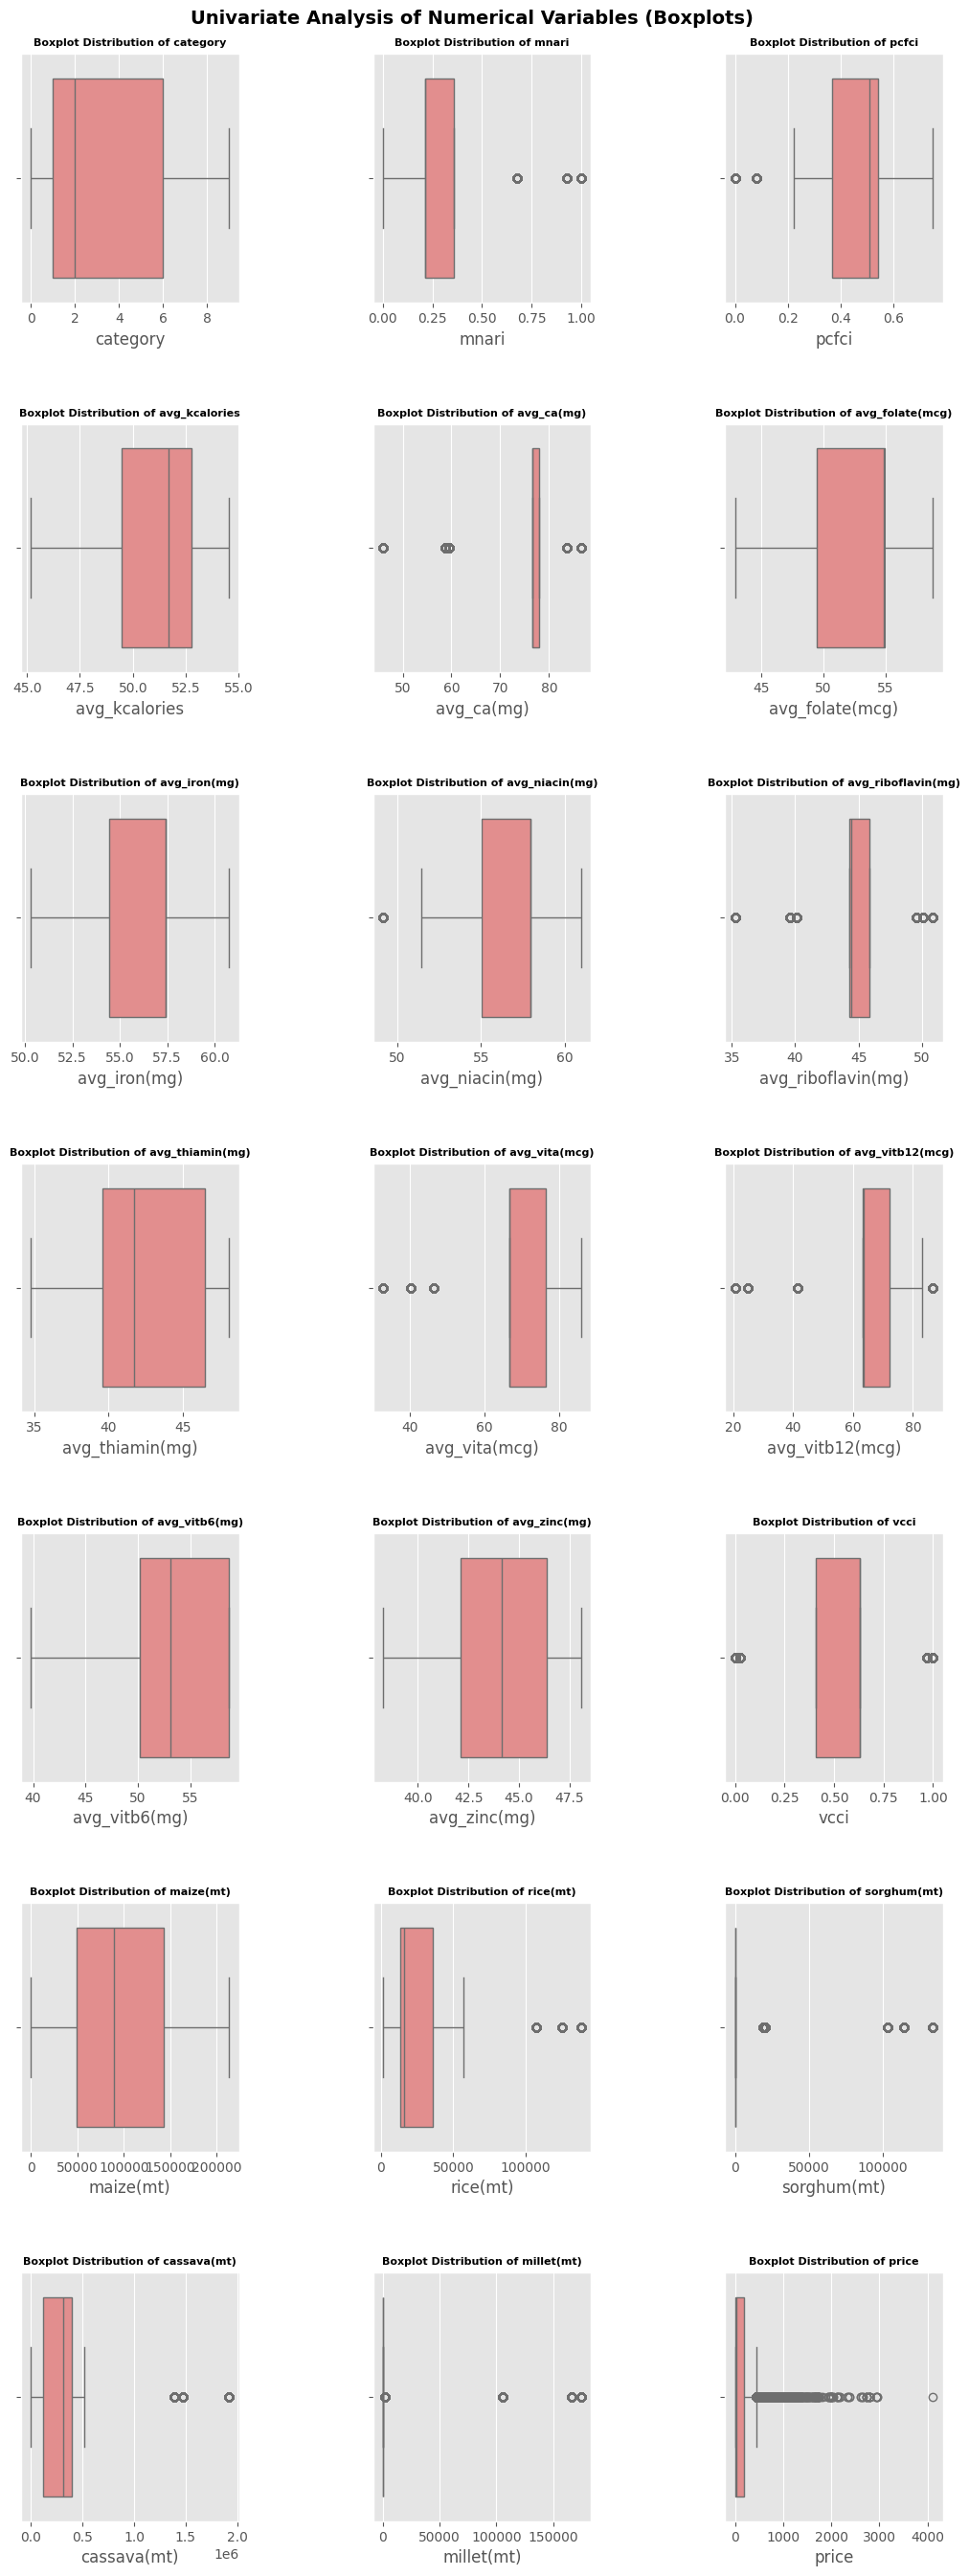

In [ ]:
#Check for outliers in the dataset

num_column = num_col.columns
n_cols = 3 #Columns for the subplot grid
n_rows = (len(num_column) + n_cols- 1)// n_cols #Calculate for the number of rows needed for subplot


fig, axes = plt.subplots(n_rows, n_cols, figsize= (12, n_rows * 4))
axes = axes.flatten() #Flatten for easy iteration
fig.tight_layout(pad= 7)
plt.suptitle(f"Univariate Analysis of Numerical Variables (Boxplots)", fontsize= 14, fontweight= "bold")

for i, col in enumerate(num_column):
  sns.boxplot(data= num_col, x=col, ax=axes[i], color="lightcoral")
  axes[i].set_title(f"Boxplot Distribution of {col}", fontsize= 8, fontweight= "bold")
  axes[i].set_xlabel(col)


# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


plt.show()

**Pattern**
- There is high outlier in the price columns
- There is low outliers in the following columns: rice(mt), sorghum(mt), cassava(mt), millet(mt), vcci, avg_folate and avg_niacin, avg_riboflavin, mnari, avg_vita, avg_vitb12, avg_ca
- The other columns dont not have outliers.

**Insight**
- The  outliers in the price of commodity across the the crops might signify the low agricultural prodction which was trigger by climate change thus causing a spike in commodity.
- This outlier also signify that the most vulnerable regions tend to miss out in the nutrient as they tend to consume less nutritious food as they allocate more budget to food commodity that are rich in carbohydrates and neglect other nutrients.

**Recommendation**
- Futher exploration should be investigated to know the real cause of price spike in the commodity.
- Government should regulate the price of commodity to better the nutrition of the society.
- Individual should be encourage to do agriculture to boost agricultural production and yield.
- Individuals should be encourage on the importance of nutrients for healthy living and productivity.
- The removal of the extreme outlier in price will be addressed after EDA in order to gain more insight and relationship patterns.

###**Non- Graphical Analysis**



####**For numerical variable**

In [ ]:
#Create a function

def univariate_non(numerical):
  for col in num_col.columns:
    #Print the column name
    print(f"\n Analysis of column: {col}")
    #Display the aggregation for each column
    display(num_col[col].agg(["count", "nunique", "mean", "std", "min", "max", "skew"]))

univariate_non(num_col)


 Analysis of column: category


count      28705.000000
nunique        9.000000
mean           3.599826
std            3.139668
min            0.000000
max            9.000000
skew           0.510267
Name: category, dtype: float64


 Analysis of column: mnari


count      28705.000000
nunique        9.000000
mean           0.339694
std            0.264583
min            0.000000
max            1.000000
skew           1.072294
Name: mnari, dtype: float64


 Analysis of column: pcfci


count      28705.000000
nunique        9.000000
mean           0.455507
std            0.192805
min            0.000000
max            0.751500
skew          -0.567220
Name: pcfci, dtype: float64


 Analysis of column: avg_kcalories


count      28705.000000
nunique        9.000000
mean          50.825668
std            2.715333
min           45.190000
max           54.540000
skew          -0.601754
Name: avg_kcalories, dtype: float64


 Analysis of column: avg_ca(mg)


count      28705.000000
nunique        9.000000
mean          73.106009
std            9.306659
min           45.960000
max           86.570000
skew          -1.274354
Name: avg_ca(mg), dtype: float64


 Analysis of column: avg_folate(mcg)


count      28705.000000
nunique        9.000000
mean          52.914230
std            4.293198
min           42.910000
max           58.820000
skew          -1.077268
Name: avg_folate(mcg), dtype: float64


 Analysis of column: avg_iron(mg)


count      28705.000000
nunique        9.000000
mean          55.982874
std            2.746195
min           50.320000
max           60.770000
skew          -0.497475
Name: avg_iron(mg), dtype: float64


 Analysis of column: avg_niacin(mg)


count      28705.000000
nunique        9.000000
mean          56.629212
std            2.631744
min           49.150000
max           60.960000
skew          -1.116169
Name: avg_niacin(mg), dtype: float64


 Analysis of column: avg_riboflavin(mg)


count      28705.000000
nunique        9.000000
mean          44.357210
std            3.614832
min           35.240000
max           50.890000
skew          -0.227115
Name: avg_riboflavin(mg), dtype: float64


 Analysis of column: avg_thiamin(mg)


count      28705.000000
nunique        9.000000
mean          42.039929
std            4.254656
min           34.760000
max           48.150000
skew          -0.305750
Name: avg_thiamin(mg), dtype: float64


 Analysis of column: avg_vita(mcg)


count      28705.000000
nunique        9.000000
mean          65.567451
std           13.703385
min           32.910000
max           85.800000
skew          -0.736520
Name: avg_vita(mcg), dtype: float64


 Analysis of column: avg_vitb12(mcg)


count      28705.000000
nunique        9.000000
mean          60.582108
std           16.340862
min           20.580000
max           86.730000
skew          -0.902063
Name: avg_vitb12(mcg), dtype: float64


 Analysis of column: avg_vitb6(mg)


count      28705.000000
nunique        9.000000
mean          52.686778
std            5.725673
min           39.800000
max           58.700000
skew          -0.544598
Name: avg_vitb6(mg), dtype: float64


 Analysis of column: avg_zinc(mg)


count      28705.000000
nunique        9.000000
mean          44.054344
std            2.619075
min           38.270000
max           48.080000
skew          -0.321766
Name: avg_zinc(mg), dtype: float64


 Analysis of column: vcci


count      28705.000000
nunique        9.000000
mean           0.566126
std            0.295985
min            0.000000
max            1.000000
skew          -0.527375
Name: vcci, dtype: float64


 Analysis of column: maize(mt)


count       28705.000000
nunique        15.000000
mean        92361.636788
std         56142.504453
min             0.000000
max        213506.000000
skew            0.107094
Name: maize(mt), dtype: float64


 Analysis of column: rice(mt)


count       28705.000000
nunique        15.000000
mean        35979.814980
std         38795.362069
min          1356.000000
max        138343.000000
skew            1.733871
Name: rice(mt), dtype: float64


 Analysis of column: sorghum(mt)


count       28705.000000
nunique         8.000000
mean        17239.932033
std         38829.997597
min             0.000000
max        134110.000000
skew            2.132112
Name: sorghum(mt), dtype: float64


 Analysis of column: cassava(mt)


count      2.870500e+04
nunique    1.400000e+01
mean       4.329513e+05
std        4.949873e+05
min        0.000000e+00
max        1.922543e+06
skew       1.898182e+00
Name: cassava(mt), dtype: float64


 Analysis of column: millet(mt)


count       28705.000000
nunique         5.000000
mean        19444.732695
std         50922.478140
min             0.000000
max        174624.000000
skew            2.381826
Name: millet(mt), dtype: float64


 Analysis of column: price


count      28705.000000
nunique     6540.000000
mean         135.020835
std          225.162694
min            0.320000
max         4114.550000
skew           3.719464
Name: price, dtype: float64

####**For categorical variable**

In [ ]:
#Create a function instance

def univariate_non(categorical):
  for col in cat_col.columns:
    #Print the column name
    print(f"\n Analysis of column: {col}")

    #Display the aggregration function
    display(cat_col[col].agg(["count", "unique", "nunique"]))
    #Display value count
    print(cat_col[col].value_counts())

univariate_non(cat_col)


 Analysis of column: region


count                                                  28705
unique     [Ashanti, Brong Ahafo, Central, Eastern, North...
nunique                                                    9
Name: region, dtype: object

region
Brong Ahafo    11013
Northern        4332
Volta           2976
Western         2902
Ashanti         2653
Central         1710
Upper East      1463
Upper West       892
Eastern          764
Name: count, dtype: int64

 Analysis of column: commodity


count                                                  28705
unique     [Cassava, Sorghum, Maize, Rice (Local), Yam, M...
nunique                                                   26
Name: commodity, dtype: object

commodity
Maize                     2819
Yam                       2323
Plantains (Apentu)        2080
Rice (Local)              2041
Cassava                   2025
Millet                    1682
Rice (Imported)           1651
Sorghum                   1567
Maize (Yellow)            1034
Plantains (Apem)           930
Yam (Puna)                 920
Gari                       900
Eggplants                  861
Soybeans                   809
Peppers (Fresh)            808
Onions                     787
Tomatoes (Navrongo)        778
Tomatoes (Local)           743
Fish (Mackerel, Fresh)     730
Meat (Chicken)             717
Peppers (Dried)            581
Cowpeas                    535
Eggs                       444
Meat (Chicken, Local)      364
Cowpeas (White)            307
Rice (Paddy)               269
Name: count, dtype: int64


###**Univariate Graphical Analysis**

####**For Numerical variable**

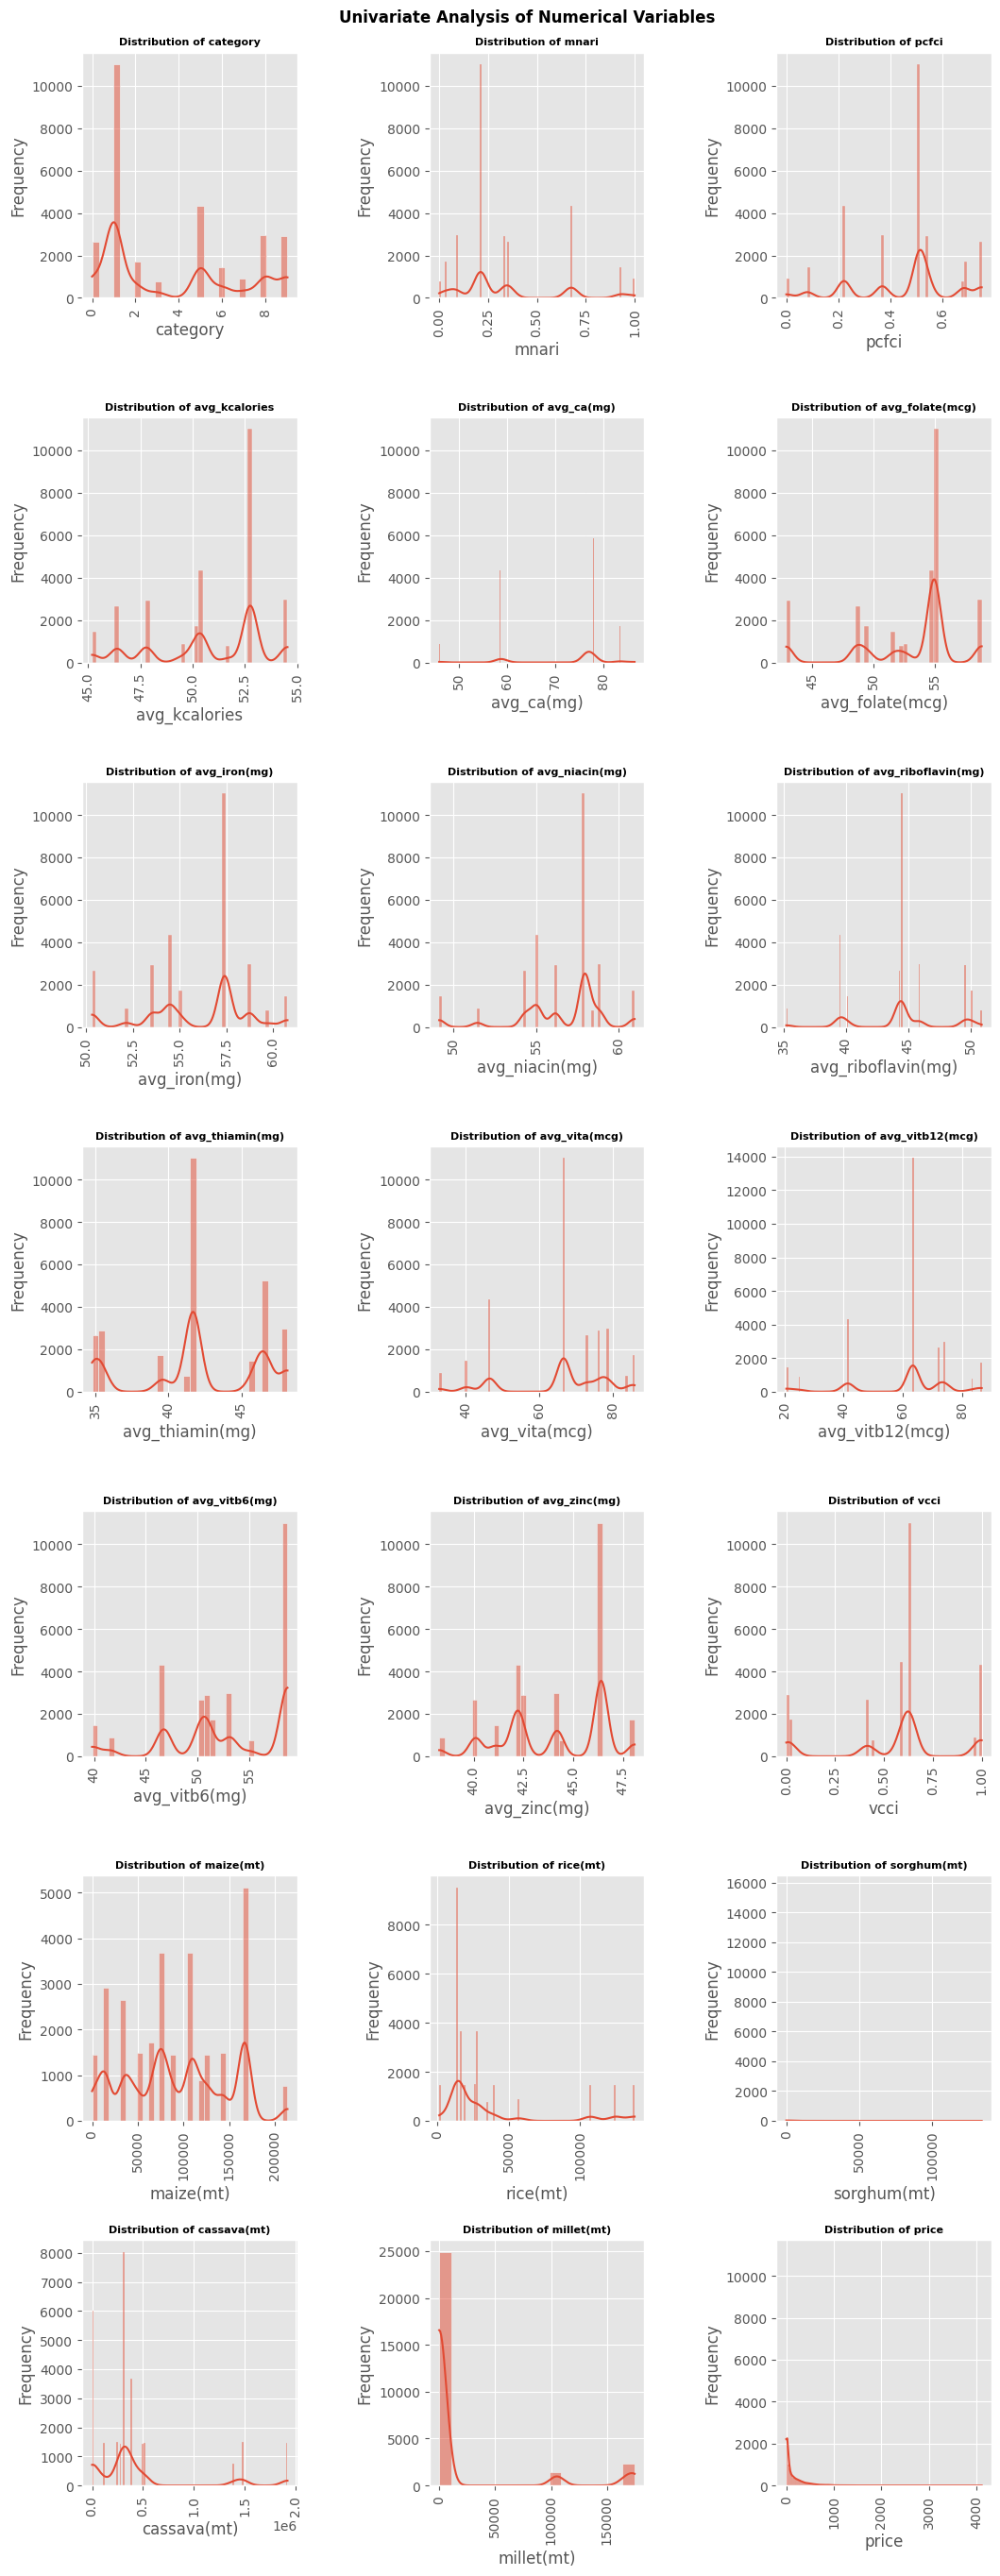

In [ ]:
#Create histoplot visualization

num_column = num_col.columns
n_cols = 3 #Column for subplot
n_rows = (len(num_column) + n_cols-1)//n_cols #Calculate the rows for subplot

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows*4))
axes = axes.flatten() #Flatten for easy iteration
fig.tight_layout(pad=7)
plt.suptitle(f"Univariate Analysis of Numerical Variables", fontsize=12, fontweight="bold")

for i, col in enumerate(num_column):
  sns.histplot(data= num_col, x=col, ax=axes[i], kde= True) # Corrected: Pass a single Axes object to ax
  axes[i].set_title(f"Distribution of {col}", fontsize=8, fontweight="bold")
  axes[i].set_xlabel(col)
  axes[i].set_ylabel("Frequency")
  axes[i].tick_params(axis="x", rotation=90)

#Remove any unused subplot
for j in range(i+1, len(axes)):
  fig.delaxes(axes[j])

plt.show()

**Insight**
- Almost all the distrubution has a unimodal distribution
- Only price column have a highly right skewed distribution.
- Sorghum seem to have no distribution.

**Recommendation**
- Further investigation on bivariate analysis should be done to explore the relationship with the target variable


####**For categorical Variable**

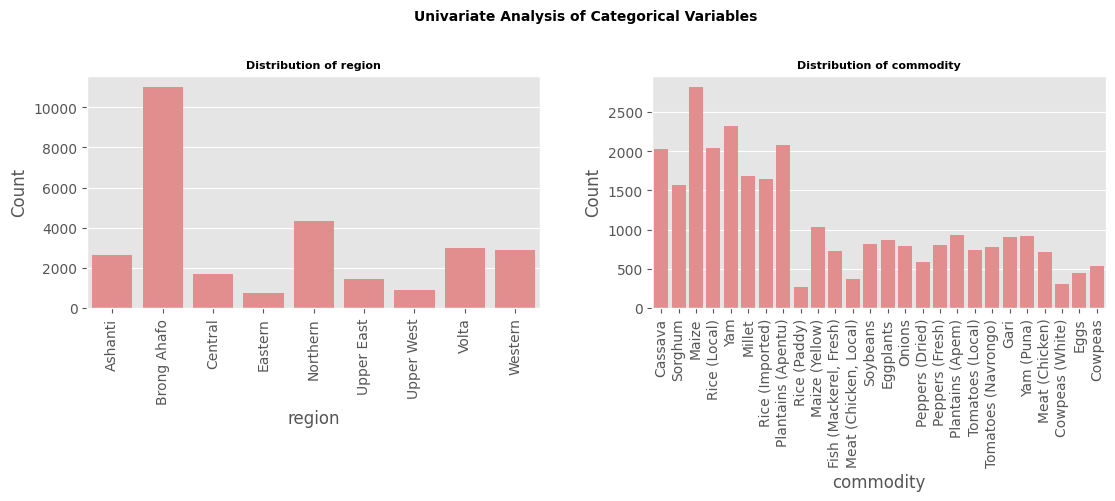

In [ ]:
#Create visualization
cat_column = cat_col.columns
n_cols = 2 #Columns for subplot
n_rows= (len(cat_column) + n_cols -1)//n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows*4))
axes = axes.flatten() #Flatten for easy iteration
fig.tight_layout(pad=5)
plt.suptitle(f"Univariate Analysis of Categorical Variables", fontsize=10, fontweight="bold")

for i, col in enumerate(cat_column):
  sns.countplot(data=cat_col, x=col, ax=axes[i], color="lightcoral")
  axes[i].set_title(f"Distribution of {col}", fontsize=8, fontweight="bold")
  axes[i].set_xlabel(col)
  axes[i].set_ylabel("Count")
  axes[i].tick_params(axis= "x", rotation=90)

#Remove any unused subplot
for j in range(i+1, len(axes)):
  fig.delaxes(axes[j])

plt.show()

**Pattern**
- For the region, Brong Ahafo has the highest count followed by Northen. The lowest is Eastern.
- For the Commodity, maize has the highest count followed by yam and Plantain. The lowest is rice(paddy) followed by cowpeas and Meat.

**Insight**
- Based on the analysis, staple food which are less nutritious and rich in nutrient seems to be less expensive while commodity which are highly nutritious are costly thus the nutrient gap in some region which cant afford this meal.

**Recommendation**
- Government should regulate the price of commodity as this will reduces nutrient gap.
- Agriculture such as planting of other crop aparts from highly carbohydrates food and rearing of local poultry should encourage as this will increase the supply and producion of commodity.
- Individuals should be encourage to have a proper meal in regardless of the low budget.


###**Bivariate Analysis**

Cat Vs Cat

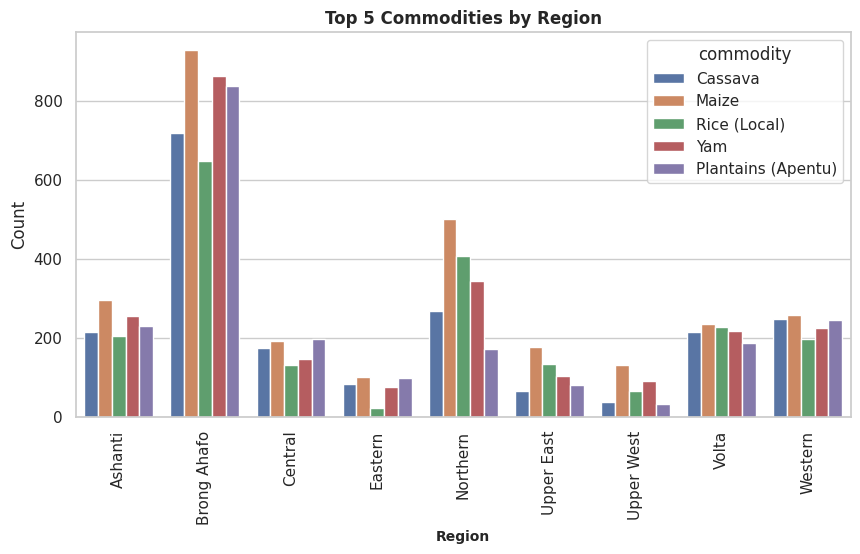

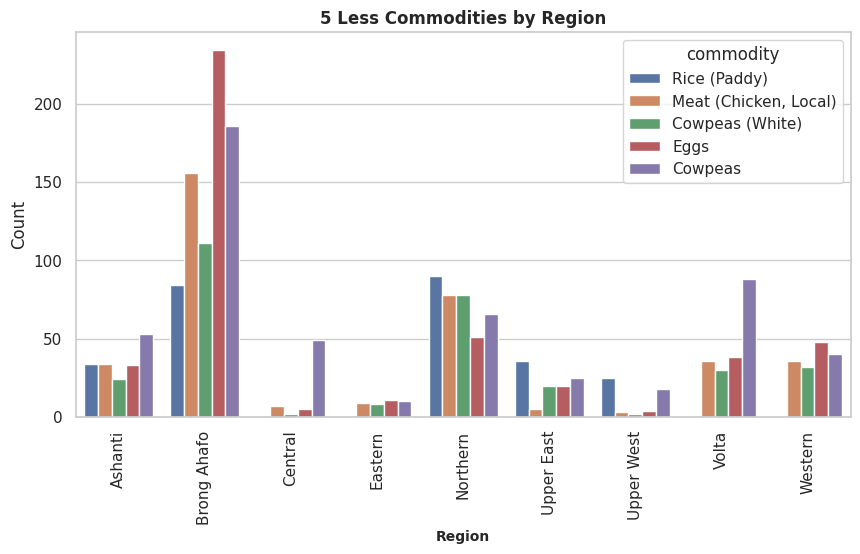

In [ ]:
# Top 5 Commodity
plt.figure(figsize= (10, 5))
sns.set(style= "whitegrid")

#Get the top 5 commodity
top_5_commodity= nutrient_gap['commodity'].value_counts().nlargest(5).index

#Filter the top 5 commodity
top_5_nutrient_gap= nutrient_gap[nutrient_gap['commodity'].isin(top_5_commodity)]

#Plot the countplot
sns.countplot(data= top_5_nutrient_gap, x= "region", hue= "commodity")
plt.title("Top 5 Commodities by Region", fontsize= 12, fontweight= "bold")
plt.xlabel("Region", fontsize= 10, fontweight= "bold")
plt.ylabel("Count")
plt.xticks(rotation= 90)
plt.show()



#5 Less Commodity
plt.figure(figsize= (10,5))
sns.set(style= "whitegrid")

#Get the 5 less commodity
less_5_commodity= nutrient_gap['commodity'].value_counts().nsmallest(5).index

#Filter the 5 less commodity
less_5_nutrient_gap= nutrient_gap[nutrient_gap['commodity'].isin(less_5_commodity)]

#Plot the countplot
sns.countplot(data= less_5_nutrient_gap, x= "region", hue= "commodity")
plt.title("5 Less Commodities by Region", fontsize= 12, fontweight= "bold")
plt.xlabel("Region", fontsize= 10, fontweight= "bold")
plt.ylabel("Count")
plt.xticks(rotation= 90)
plt.show()

####**Num vs Num**

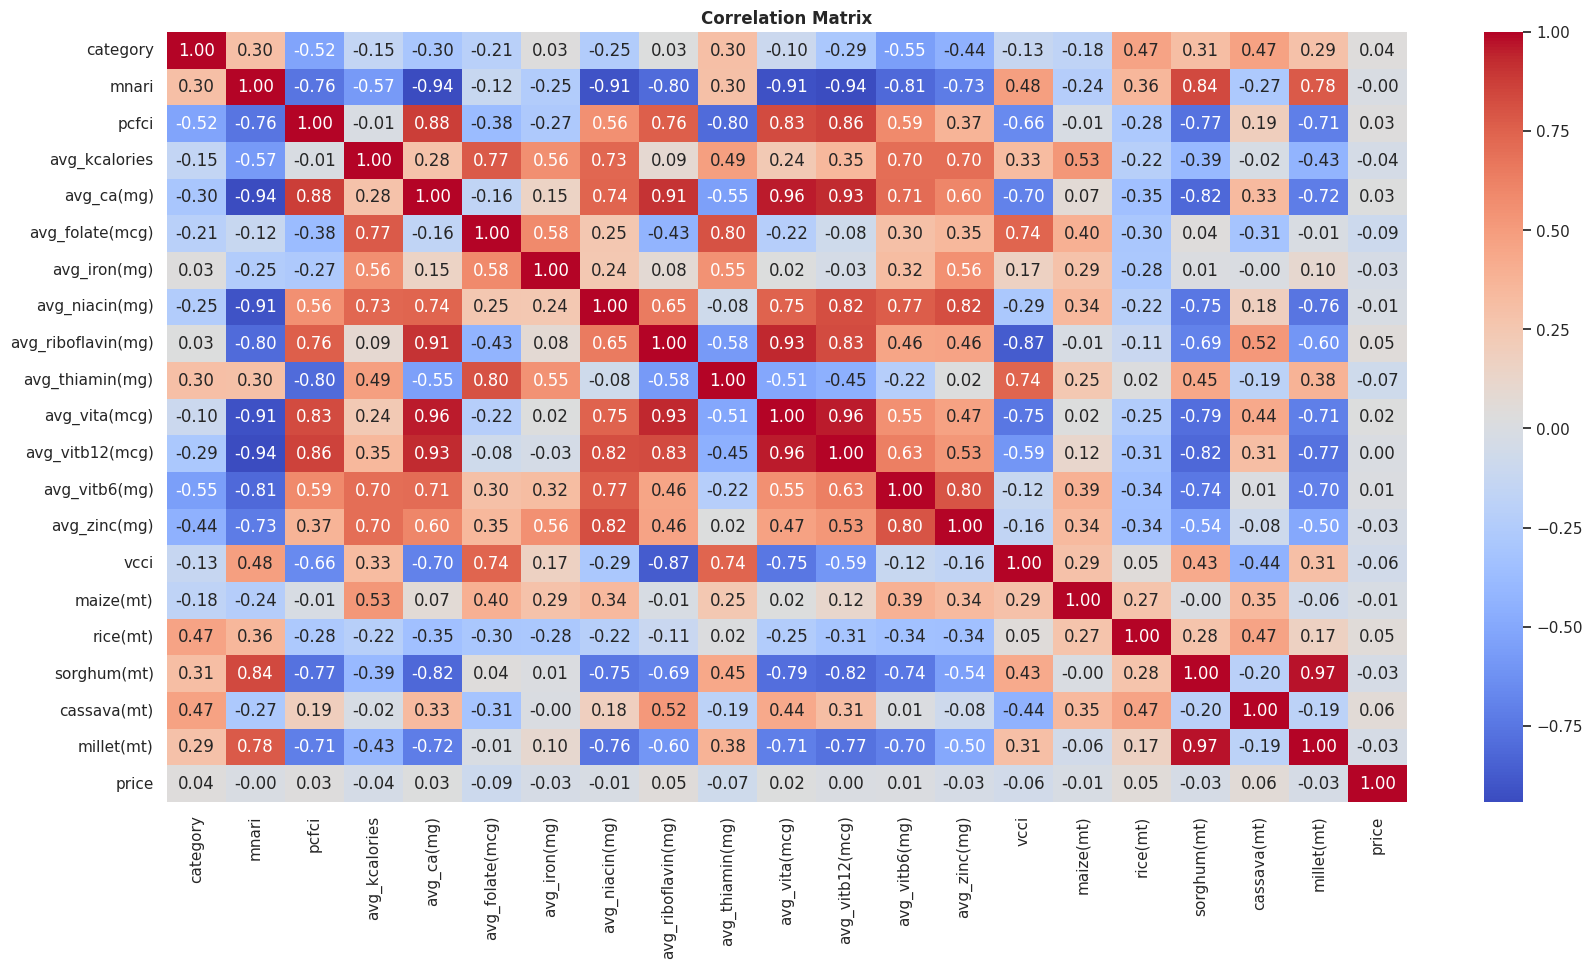

In [ ]:
#Correlation matrix
corr_matrix= num_col.corr()

#PLot the graph
plt.figure(figsize= (20,10))
sns.heatmap(corr_matrix, annot= True, cmap= "coolwarm", fmt=".2f")
plt.title("Correlation Matrix", fontsize= 12, fontweight= "bold")
plt.show()

**Pattern**
- The nutrients adequency have negative correlation with the target variable (mnari)
- Price has no correlation with the target variable
- Per capita food consumption index (pcfci) have a negative correlation with the target variable.
- Vulnerablility to Climate Change Index (vcci) have slightly positive correlation with the target variable
- Commodity such as maize and cassava have slightly negative correlation with the target variable.
- Commodity such as sorghum and millet have positive correlation with the target variable
- Rice have a slight positive correlation with the target variable
- Categories have a slight positive correlation with the target variable


**Insight**
- The most vulnerable region are often faced with severe nutrient gap, this could be as a low budget allocated to more nutritious food commodity.
- Ghana seem to consume more of maize, cassava and rice as a major meal, a reduction of these maize and cassava production which contain nutrient is slightly faced with nutrient gap while the consumption of rice(local) can severe the nutrient gap in the affected regions.

**Recommendation**
- Government should investigate the climate change and provide enable environment for the region to produce more maize and cassava.
- The price of commodity of the highly nutritious commodity should be regulated for easy accessible and purchase.
- The importance of balanced diet should be corporated in school and establishment.
- Diversification in Agriculture should be encourage to have large production of commodity apart from crops.
- Further exploration on price should be visualized along commodity based on region to understanding the realtionship.

In [ ]:
#Create pairplot visualization
plt.figure(figsize= (20,10))
sns.set(style="whitegrid")
sns.pairplot(nutrient_gap, hue= "mnari")
plt.title("Pairplot of Numerical Variables", fontsize= 12, fontweight= "bold")
plt.show()

<Figure size 2000x1000 with 0 Axes>

In [ ]:
#Scatterplot

#Mnari Vs Price
plt.figure(figsize= (10,5))
plt.scatter(data= nutrient_gap, x= "mnari", y= "price")
plt.title("Mnari Vs Price", fontsize= 12, fontweight= "bold")
plt.xlabel("Mnari", fontsize= 10, fontweight= "bold")
plt.show()


#Mnari Vs Category
plt.figure(figsize= (10,5))
plt.scatter(data= nutrient_gap, x= "mnari", y= "category")
plt.title("Mnari Vs Category", fontsize= 12, fontweight= "bold")
plt.xlabel("Mnari", fontsize= 10, fontweight= "bold")
plt.show()


#Mnari Vs Pcfci
plt.figure(figsize= (10,5))
plt.scatter(data= nutrient_gap, x= "mnari", y= "pcfci")
plt.title("Mnari Vs Pcfci", fontsize= 12, fontweight= "bold")
plt.xlabel("Mnari", fontsize= 10, fontweight= "bold")
plt.show()


# Mnari Vs Vcci
plt.figure(figsize= (10,5))
plt.scatter(data= nutrient_gap, x= "mnari", y= "vcci")
plt.title("Mnari Vs Vcci", fontsize= 12, fontweight= "bold")
plt.xlabel("Mnari", fontsize= 10, fontweight= "bold")
plt.show()

#Rice Production Vs Mnari
plt.figure(figsize= (10,5))
plt.scatter(data= nutrient_gap, x= "rice(mt)", y= "mnari")
plt.title("Rice Production Vs Mnari", fontsize= 12, fontweight= "bold")
plt.xlabel("Rice Production", fontsize= 10, fontweight= "bold")
plt.show()


#Sorghum Production Vs Mnari
plt.figure(figsize= (10,5))
plt.scatter(data= nutrient_gap, x= "sorghum(mt)", y= "mnari")
plt.title("Sorghum Production Vs Mnari", fontsize= 12, fontweight= "bold")
plt.xlabel("Sorghum Production", fontsize= 10, fontweight= "bold")
plt.show()


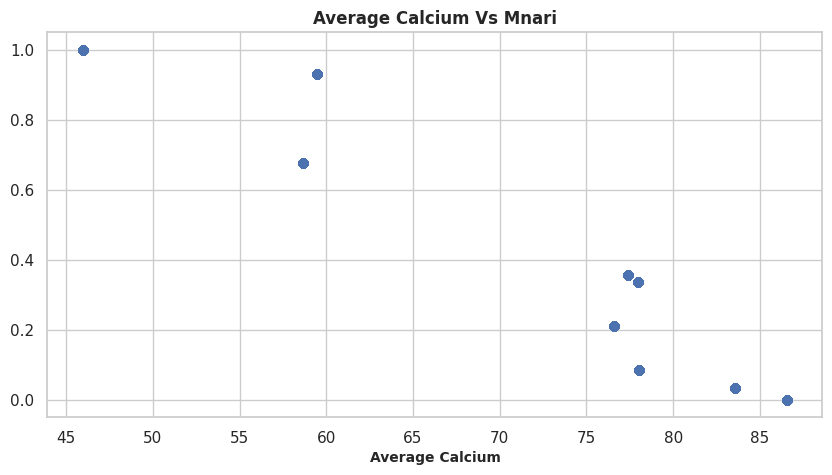

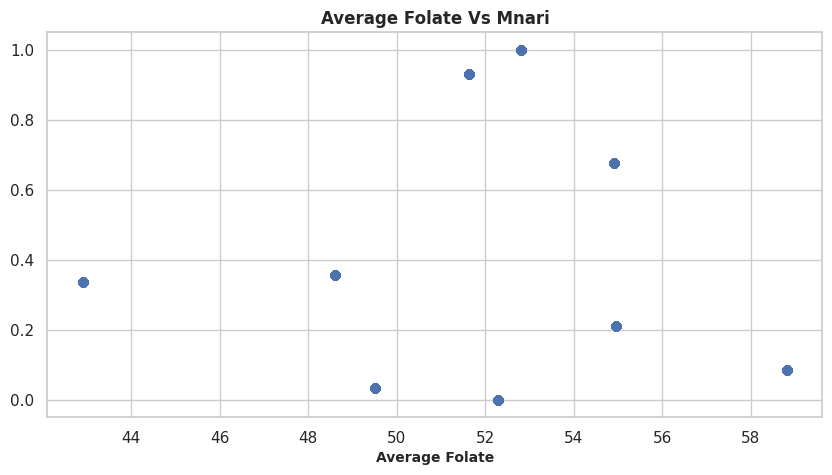

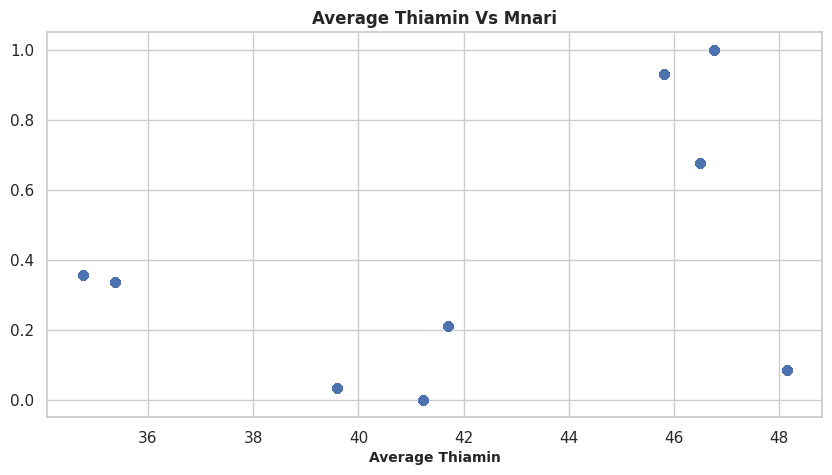

In [ ]:
#Average Calcium Vs Mnari
plt.figure(figsize= (10,5))
plt.scatter(data= nutrient_gap, x= "avg_ca(mg)", y= "mnari")
plt.title("Average Calcium Vs Mnari", fontsize= 12, fontweight= "bold")
plt.xlabel("Average Calcium", fontsize= 10, fontweight= "bold")
plt.show()

#Average Folate Vs Mnari
plt.figure(figsize= (10,5))
plt.scatter(data= nutrient_gap, x= "avg_folate(mcg)", y= "mnari")
plt.title("Average Folate Vs Mnari", fontsize= 12, fontweight= "bold")
plt.xlabel("Average Folate", fontsize= 10, fontweight= "bold")
plt.show()


#Average Thiamin Vs Mnari
plt.figure(figsize= (10,5))
plt.scatter(data= nutrient_gap, x= "avg_thiamin(mg)", y= "mnari")
plt.title("Average Thiamin Vs Mnari", fontsize= 12, fontweight= "bold")
plt.xlabel("Average Thiamin", fontsize= 10, fontweight= "bold")
plt.show()

####**Cat Vs Num**


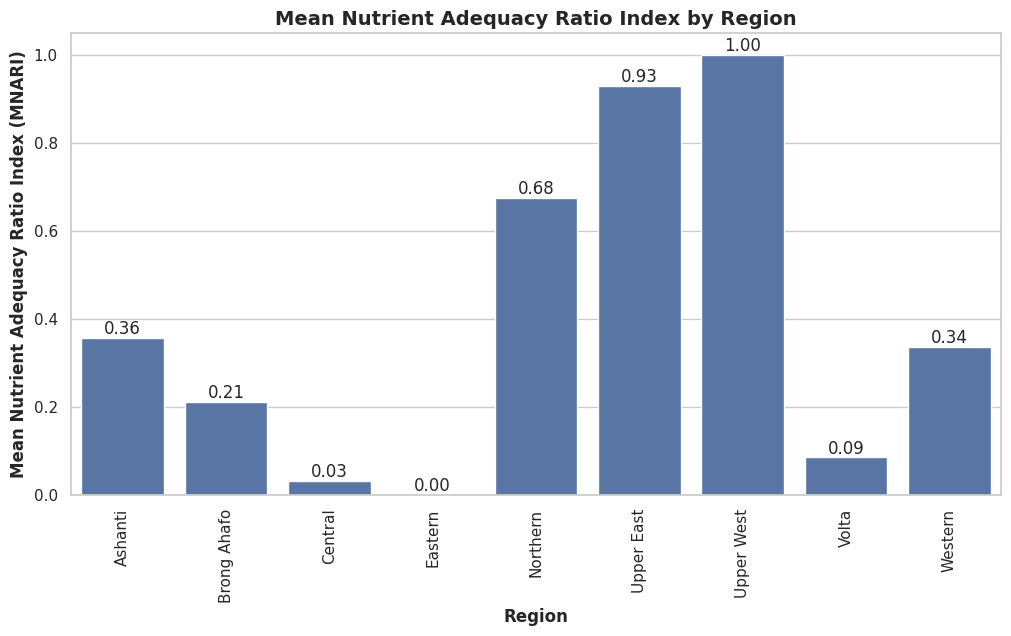

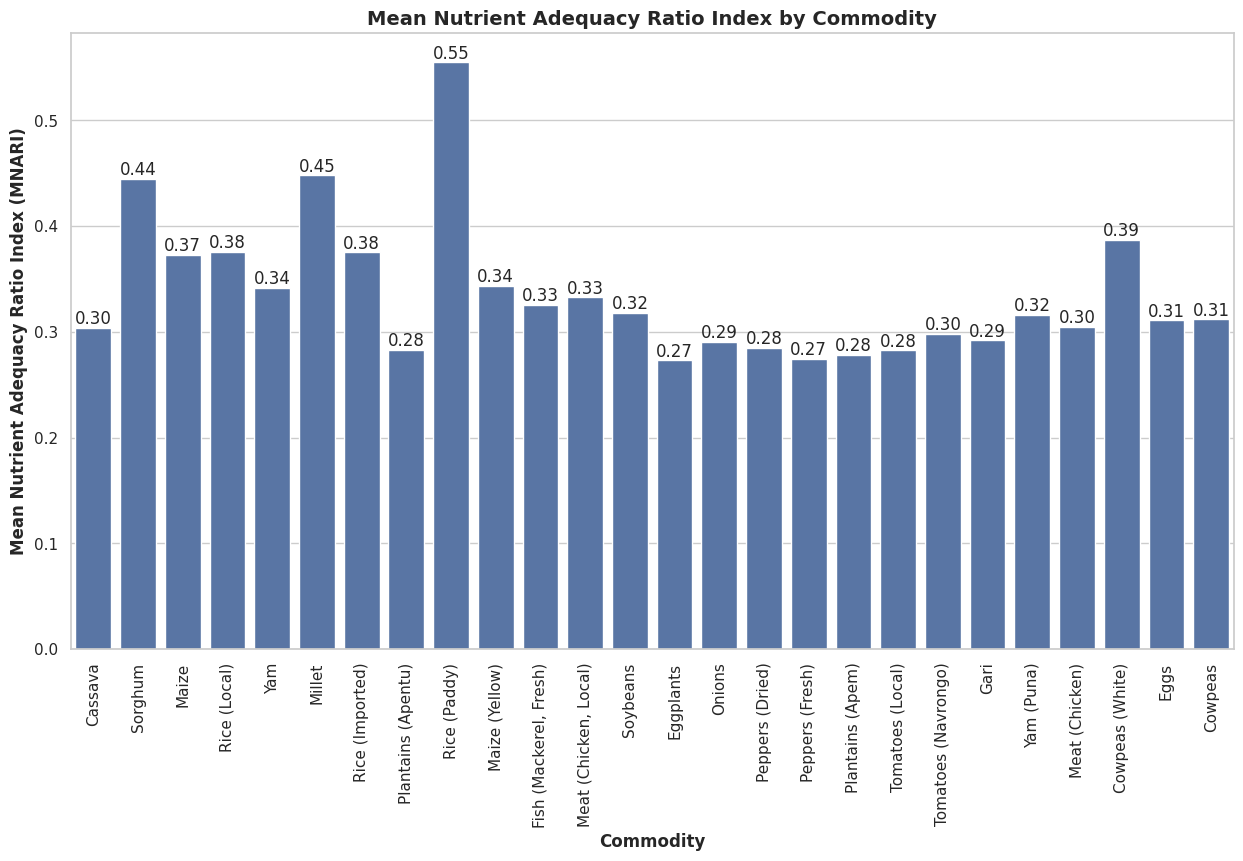

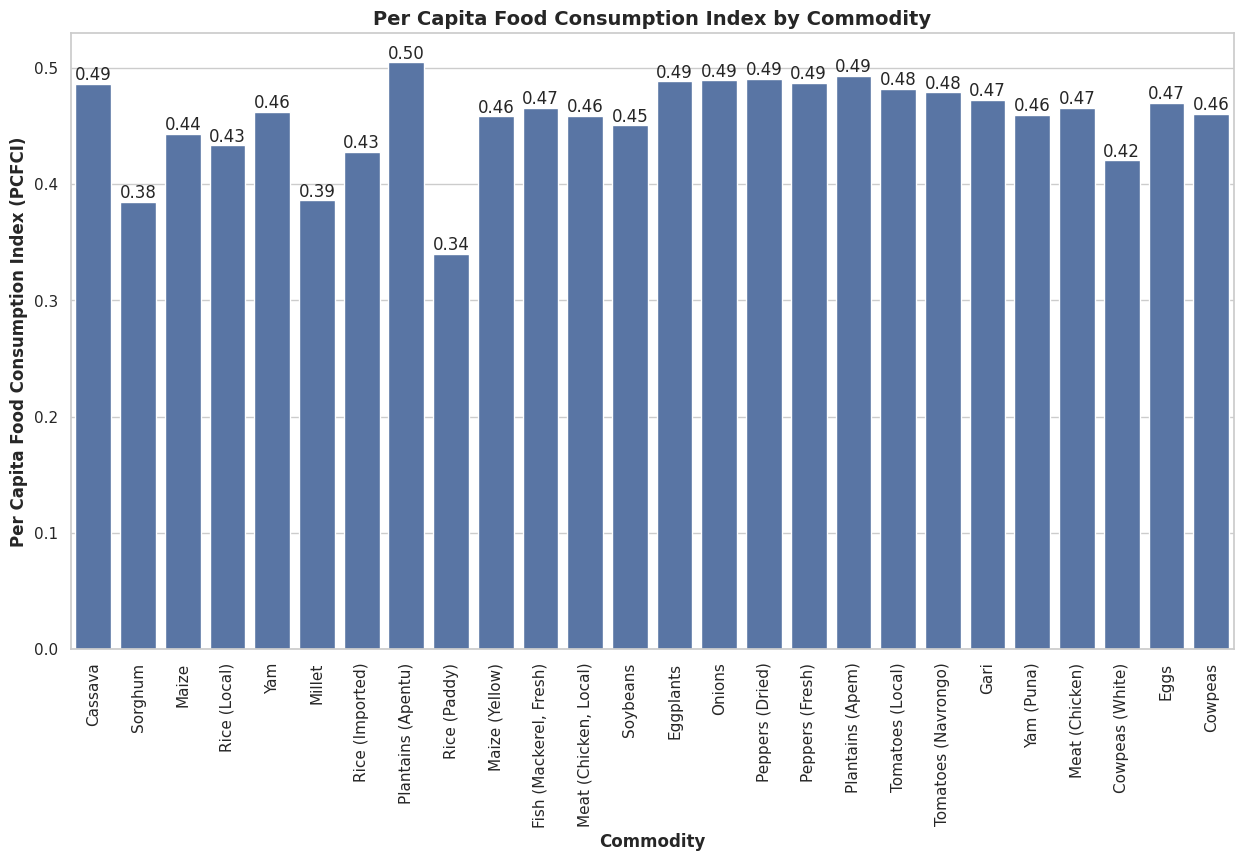

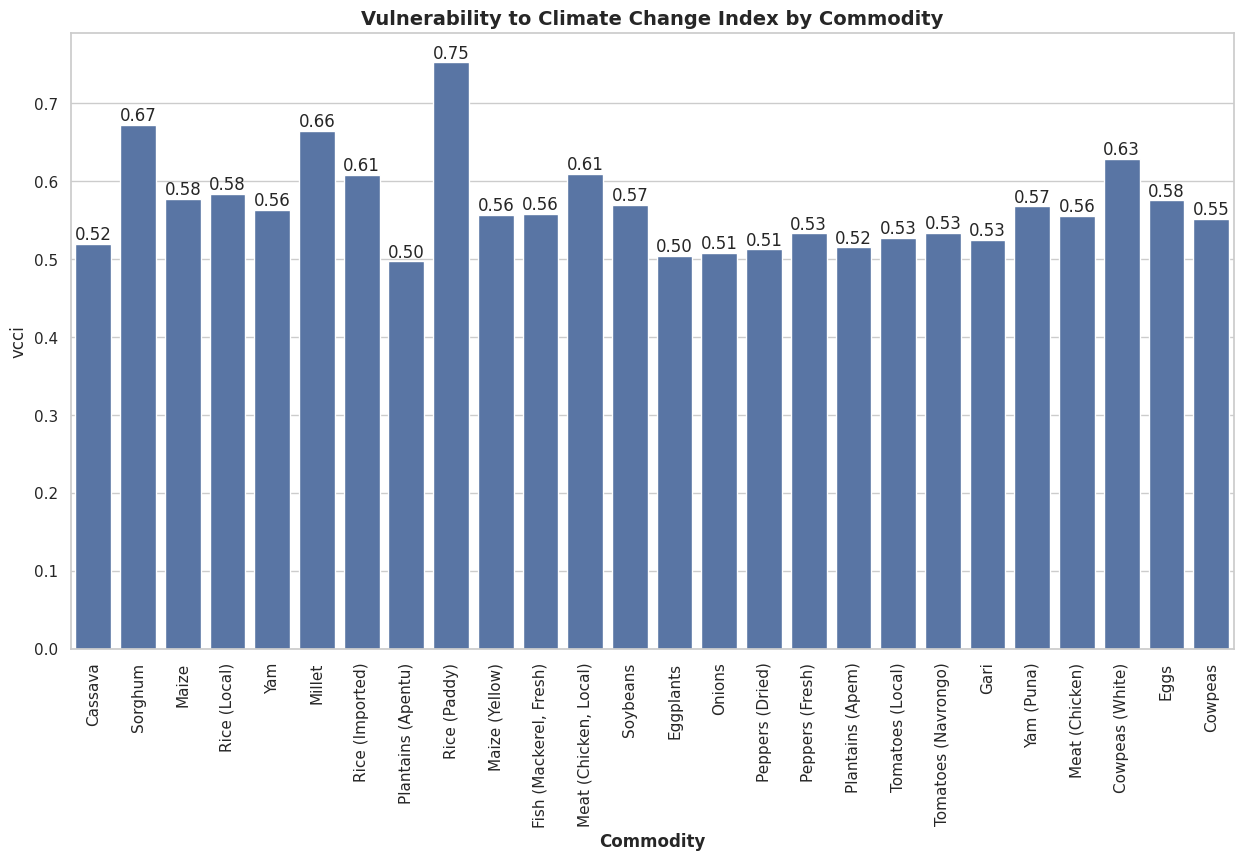

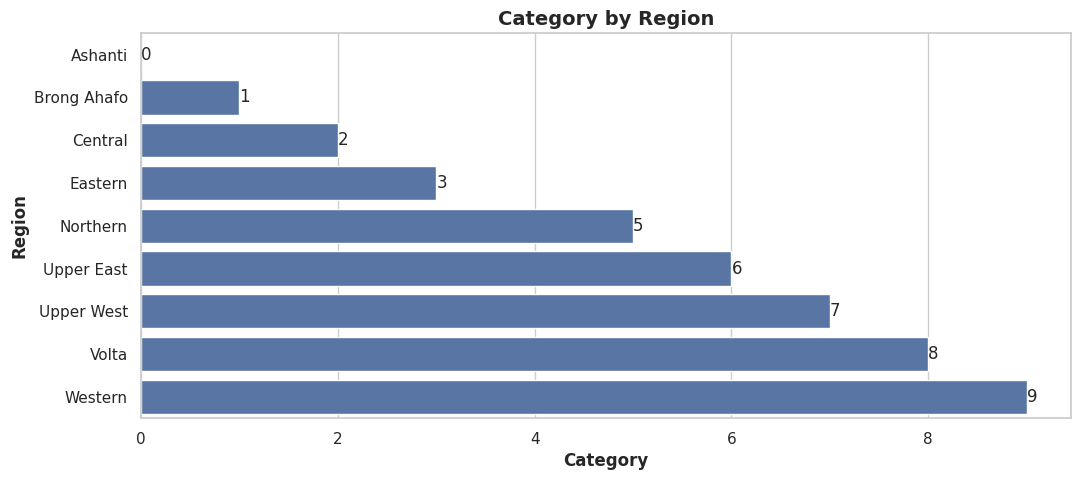

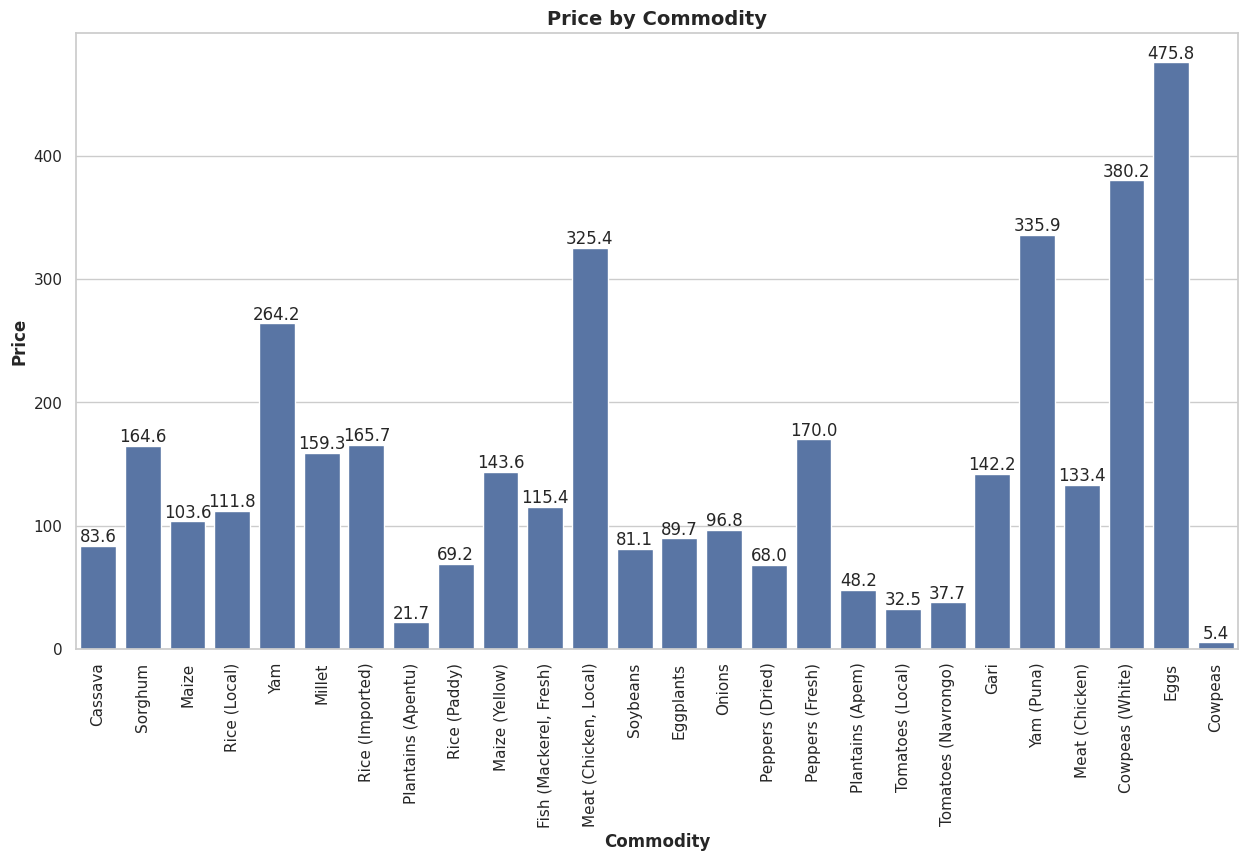

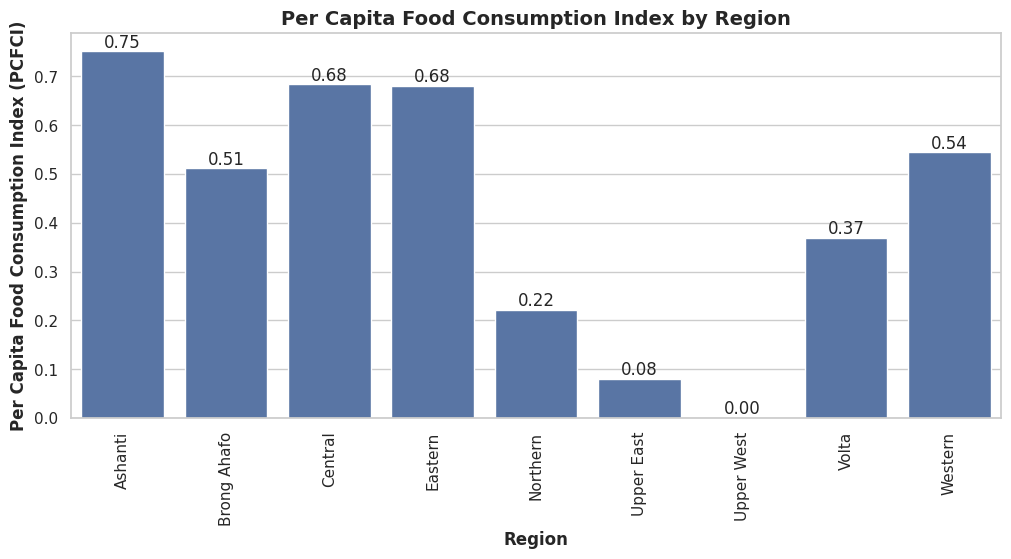

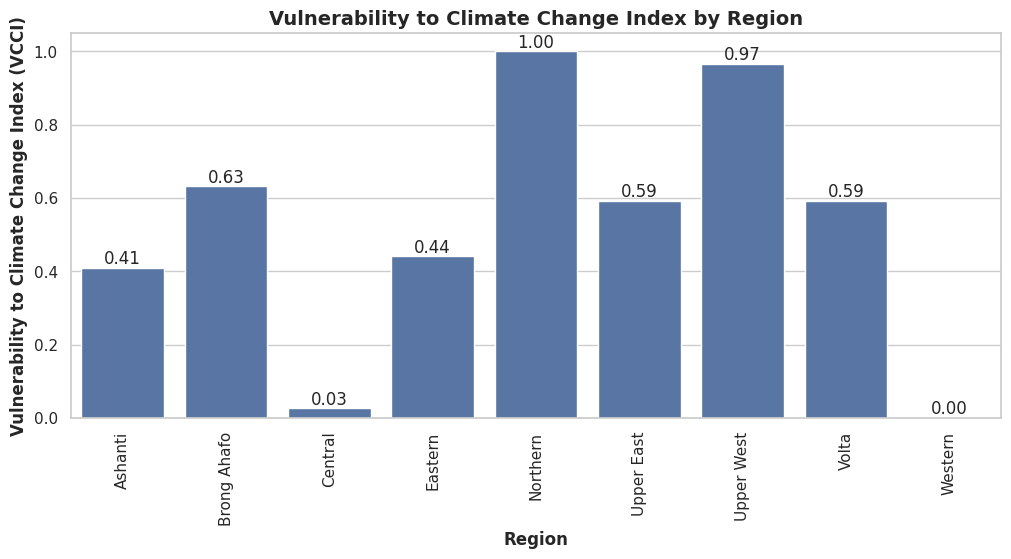

In [ ]:
# Region Vs Mnari
plt.figure(figsize= (12, 6))
ax = sns.barplot(data= nutrient_gap, x= "region", y= "mnari", errorbar=None)
plt.title("Mean Nutrient Adequacy Ratio Index by Region", fontsize= 14, fontweight= "bold")
plt.xlabel("Region", fontsize= 12, fontweight= "bold")
plt.ylabel("Mean Nutrient Adequacy Ratio Index (MNARI)", fontsize= 12, fontweight= "bold")
plt.xticks(rotation=90)

# Add text labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.show()

#Mnari Vs Commodity
plt.figure(figsize= (15, 8))
ax = sns.barplot(data= nutrient_gap, x= "commodity", y= "mnari", errorbar=None)
plt.title("Mean Nutrient Adequacy Ratio Index by Commodity", fontsize= 14, fontweight= "bold")
plt.xlabel("Commodity", fontsize= 12, fontweight= "bold")
plt.ylabel("Mean Nutrient Adequacy Ratio Index (MNARI)", fontsize= 12, fontweight= "bold")
plt.xticks(rotation=90)

# Add text labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.show()


#Commodity Vs PCFCI
plt.figure(figsize= (15,8))
ax = sns.barplot(data= nutrient_gap, x= "commodity", y= "pcfci", errorbar=None)
plt.title("Per Capita Food Consumption Index by Commodity", fontsize= 14, fontweight= "bold")
plt.xlabel("Commodity", fontsize= 12, fontweight= "bold")
plt.ylabel("Per Capita Food Consumption Index (PCFCI)", fontsize= 12, fontweight= "bold")
plt.xticks(rotation=90)

# Add text labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.show()


#Commodity Vs VCCI
plt.figure(figsize= (15,8))
ax = sns.barplot(data= nutrient_gap, x= "commodity", y= "vcci", errorbar=None)
plt.title("Vulnerability to Climate Change Index by Commodity", fontsize= 14, fontweight= "bold")
plt.xlabel("Commodity", fontsize= 12, fontweight= "bold")
plt.xticks(rotation=90)

# Add text labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.show()


#Category Vs Region
plt.figure(figsize= (12,5))
ax = sns.barplot(data= nutrient_gap, x= "category", y= "region", errorbar=None)
plt.title("Category by Region", fontsize= 14, fontweight= "bold")
plt.xlabel("Category", fontsize= 12, fontweight= "bold")
plt.ylabel("Region", fontsize= 12, fontweight= "bold")

# Add text labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

plt.show()

#Price Vs Commodity
plt.figure(figsize= (15,8))
ax = sns.barplot(data= nutrient_gap, x= "commodity", y= "price", errorbar=None)
plt.xlabel("Commodity", fontsize= 12, fontweight= "bold")
plt.ylabel("Price", fontsize= 12, fontweight= "bold")
plt.title("Price by Commodity", fontsize= 14, fontweight= "bold")
plt.xticks(rotation=90)

# Add text labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')

plt.show()


#Region Vs PCFCI
plt.figure(figsize= (12,5))
ax = sns.barplot(data= nutrient_gap, x ="region", y ="pcfci", errorbar= None)
plt.title("Per Capita Food Consumption Index by Region", fontsize= 14, fontweight= "bold")
plt.xlabel("Region", fontsize= 12, fontweight= "bold")
plt.ylabel("Per Capita Food Consumption Index (PCFCI)", fontsize= 12, fontweight= "bold")
plt.xticks(rotation=90)

#Add text labels on top of each bar
for container in ax.containers:
  ax.bar_label(container, fmt= "%.2f")

plt.show()


#Region Vs VCCI
plt.figure(figsize=(12, 5))
ax= sns.barplot(data= nutrient_gap, x= "region", y= "vcci", errorbar= None)
plt.title("Vulnerability to Climate Change Index by Region", fontsize= 14, fontweight= "bold")
plt.xlabel("Region", fontsize= 12, fontweight= "bold")
plt.ylabel("Vulnerability to Climate Change Index (VCCI)", fontsize= 12, fontweight= "bold")
plt.xticks(rotation=90)

#Add text labels on top of each bar
for container in ax.containers:
  ax.bar_label(container, fmt= "%.2f")

plt.show()

**Pattern**
- For Mnari Vs Region: Eastern has the lowest followed by Central. The moderate region is Northern. The highest is Upper West followed by UpperEast.
- For Mnari Vs Commodity: Rice(Paddy) is the highest followed by Millet and Sorghum. The lowest is Eggplant followed by Plantain,pepper, plantain and tomatoes.
- For PCFCI Vs Commodity: Plantain is the highest followed by pepper, eggplant and cassava. The lowest is Rice(paddy) followed by Sorghum.
- For VCCI Vs Commodity: Rice (paddy) is the highest followed by sorghum. The lowest is Plantain.
- For Price Vs Commodity: The highest is Eggs followed by cowpea(white), yam(puna) and meat. The lowest is Cowpea followed by plantain.
- For PCFCI Vs Region: The highest is Ashanti followed by Central and Eastern. The lowest is Upper West followed by Upper East.
- For VCCI Vs Region: The highest is Northern followed by Upper West. The lowest is Western followed by Central.

**Insight**
- Based on the analysis, the region that suffered from severe nutrients gap tends to have low per capita food consumption index and high vulnerability to climate change index.
- Plantain tends to be the highest consume commodity which is not slightly affected by climate change and have low price thus making its purchase highly. This high consumption can lead to severe nutrient gap in the affected region.
- Highly proteinous food and high rich fibre food such as sorghum, rice(paddy)and millet are often affected by climate change and the high price. With this, the consumption rate is low when compared to the staple and carbohydrate commodity thus increasing severe nutrient gap condition.
- The northern part of Ghana is very susceptible to climate change and harsh weather condition, this might have an impact in agricultural production thus making them vulnerable in nutrition.

**Recommendation**
- Governement should investigate the climate change in these affected region in order to agricultural production and yield.
- Price of commodity should be regulated, thus increasing the consumption of rich meal by the affected region.
- Individual should be encouraged and enlighten on the importance of nutrition especially to foster healthy living.

####**Multivariate Analysis**

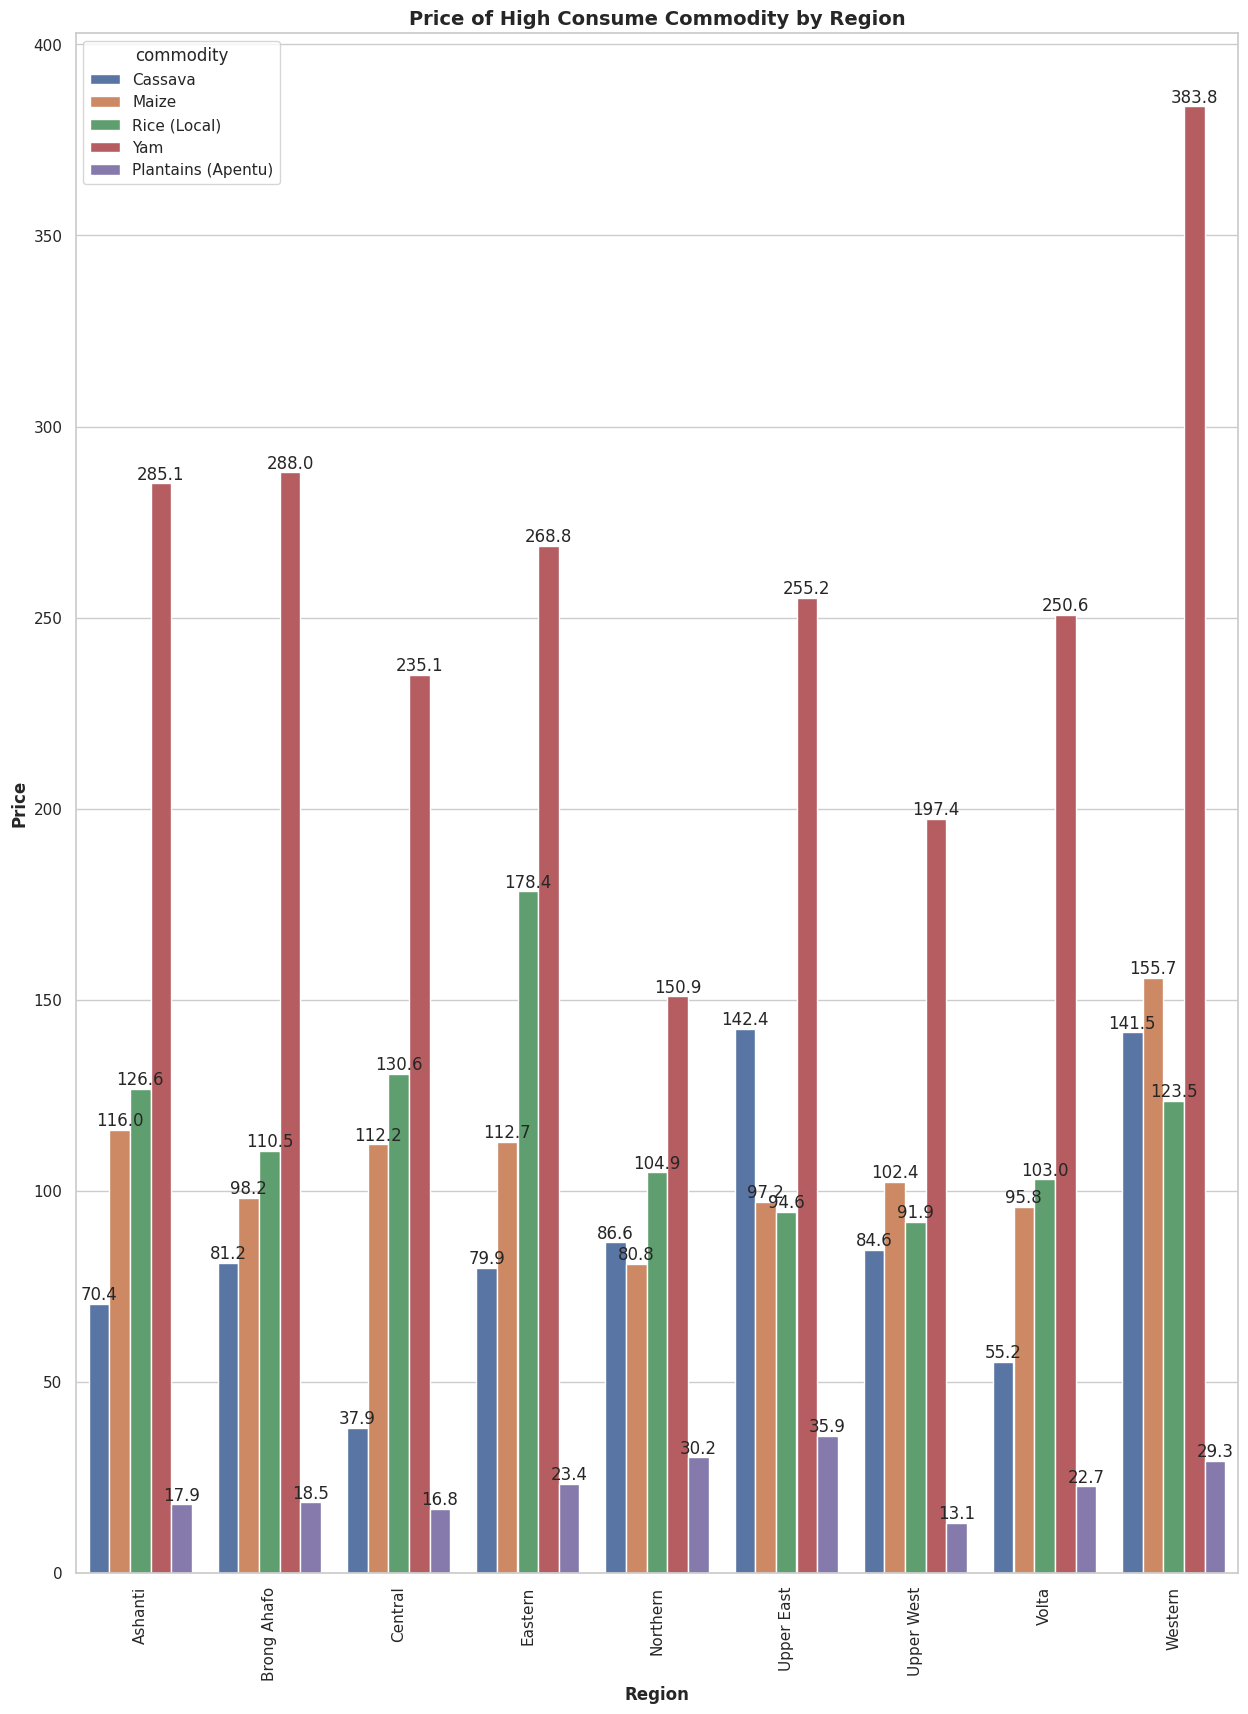

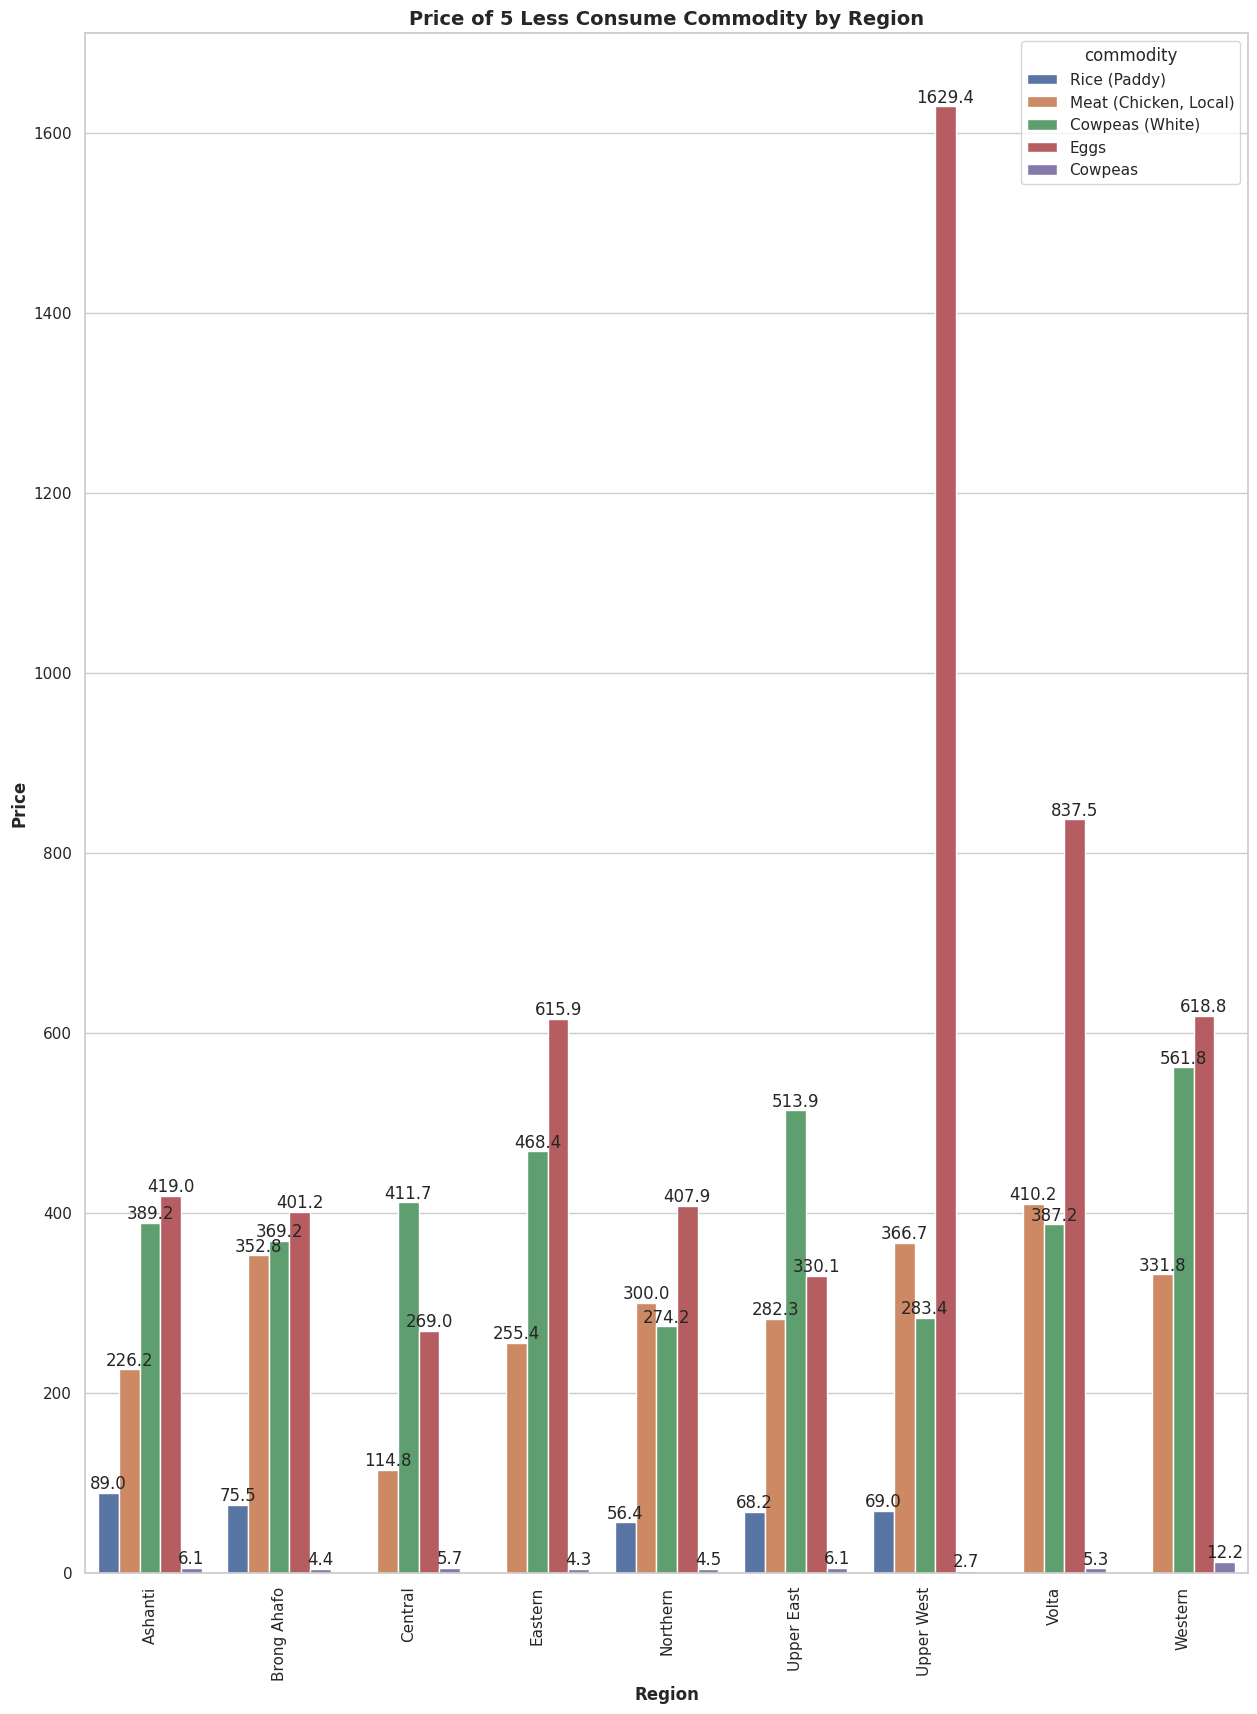

In [ ]:
#Top 5 Commodity Vs Price Vs Region
plt.figure(figsize= (15,20))
ax = sns.barplot(data= top_5_nutrient_gap, x="region", y= "price", hue= "commodity", errorbar=None)
plt.title("Price of High Consume Commodity by Region", fontsize= 14, fontweight= "bold")
plt.xlabel("Region", fontsize= 12, fontweight= "bold")
plt.ylabel("Price", fontsize= 12, fontweight= "bold")
plt.xticks(rotation=90)

#Label the box
for container in ax.containers:
  ax.bar_label(container, fmt='%.1f')

plt.show()


#Less 5 Commodity Vs Price Vs Region
plt.figure(figsize= (15,20))
ax = sns.barplot(data= less_5_nutrient_gap, x="region", y= "price", hue= "commodity", errorbar=None)
plt.title("Price of 5 Less Consume Commodity by Region", fontsize= 14, fontweight= "bold")
plt.xlabel("Region", fontsize= 12, fontweight= "bold")
plt.ylabel("Price", fontsize= 12, fontweight= "bold")
plt.xticks(rotation=90)

#Label the box
for container in ax.containers:
  ax.bar_label(container, fmt='%.1f')

plt.show()

##**Step 5: Data preprocessing, Feature Engineering and Feature Selection**

###**Data Preprocessing**

In [ ]:
#View the dataset
nutrient_gap.head()

category   region   mnari   pcfci  avg_kcalories  avg_ca(mg)  \
0         0  Ashanti  0.3577  0.7515          46.39       77.39   
1         0  Ashanti  0.3577  0.7515          46.39       77.39   
2         0  Ashanti  0.3577  0.7515          46.39       77.39   
3         0  Ashanti  0.3577  0.7515          46.39       77.39   
4         0  Ashanti  0.3577  0.7515          46.39       77.39   

   avg_folate(mcg)  avg_iron(mg)  avg_niacin(mg)  avg_riboflavin(mg)  ...  \
0            48.61         50.32           54.35               44.24  ...   
1            48.61         50.32           54.35               44.24  ...   
2            48.61         50.32           54.35               44.24  ...   
3            48.61         50.32           54.35               44.24  ...   
4            48.61         50.32           54.35               44.24  ...   

   avg_vitb6(mg)  avg_zinc(mg)   vcci  maize(mt)  rice(mt)  sorghum(mt)  \
0          50.19          40.1  0.409      35684     13589          107   
1          50.19          40.1  0.409      35684     13589          107   
2          50.19          40.1  0.409      35684     13589          107   
3          50.19          40.1  0.409      35684     13589          107   
4          50.19          40.1  0.409      35684     13589          107   

   cassava(mt)  millet(mt)     commodity  price  
0       314125           0       Cassava  10.31  
1       314125           0       Sorghum  38.25  
2       314125           0       Cassava  11.00  
3       314125           0         Maize  21.75  
4       314125           0  Rice (Local)  33.63  

[5 rows x 23 columns]

**Insight**
- Based on the EDA analysis done on numerical variable, the following columns will be clipped to handle extreme outliers and skewness in their distribution
- The columns are rice, sorghum, cassava, millet and price.
- mnari will not be handled as it is the assigned target variable.


In [ ]:
#Clipping to handle extreme outlier and skewness
column_to_clip= ["rice(mt)", "sorghum(mt)", "sorghum(mt)", "sorghum(mt)", "price"]

#Applying clipping to each of the column
for col in column_to_clip:
  upper_bound= nutrient_gap[col].quantile(0.95)
  lower_bound= nutrient_gap[col].quantile(0.00)

  nutrient_gap[col]= nutrient_gap[col].clip(lower= lower_bound, upper= upper_bound)

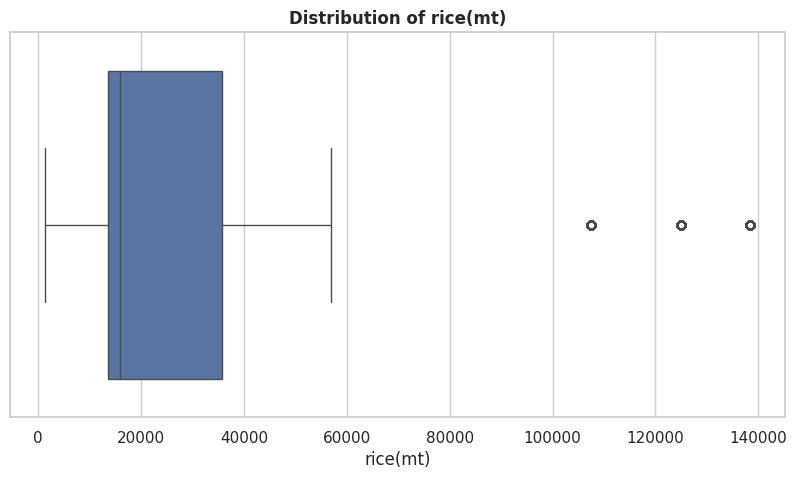

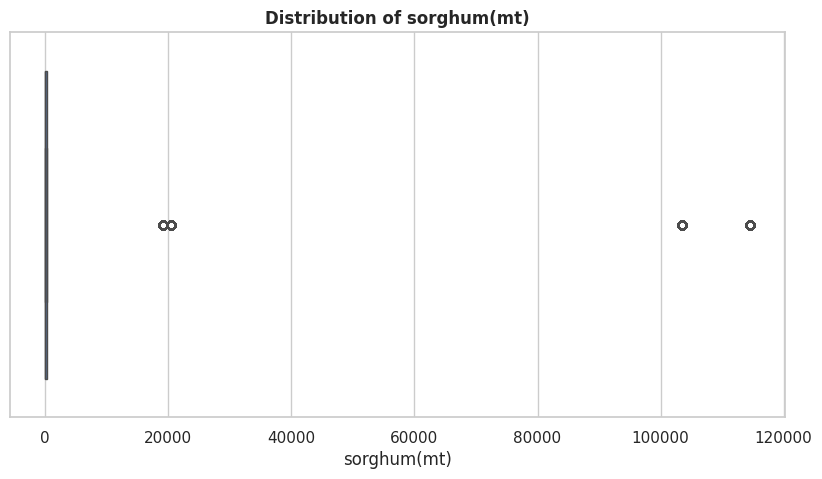

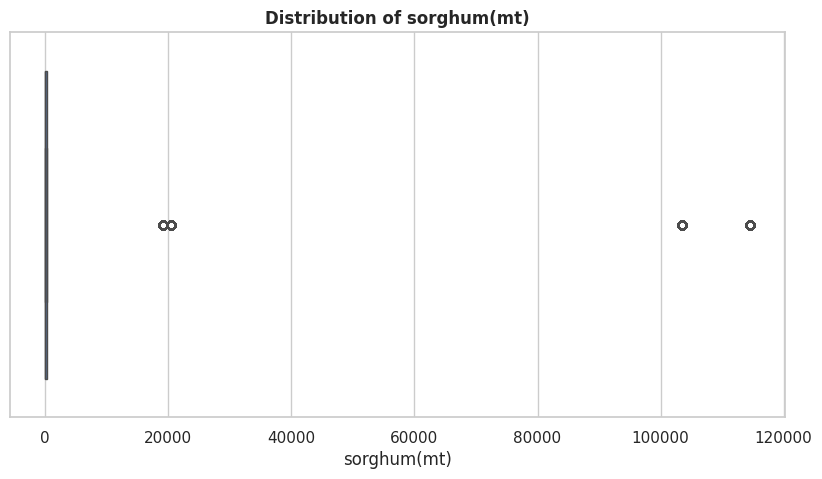

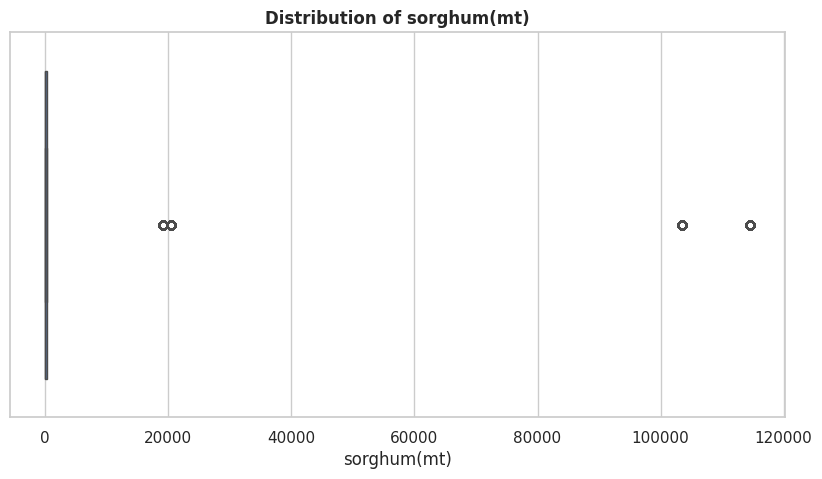

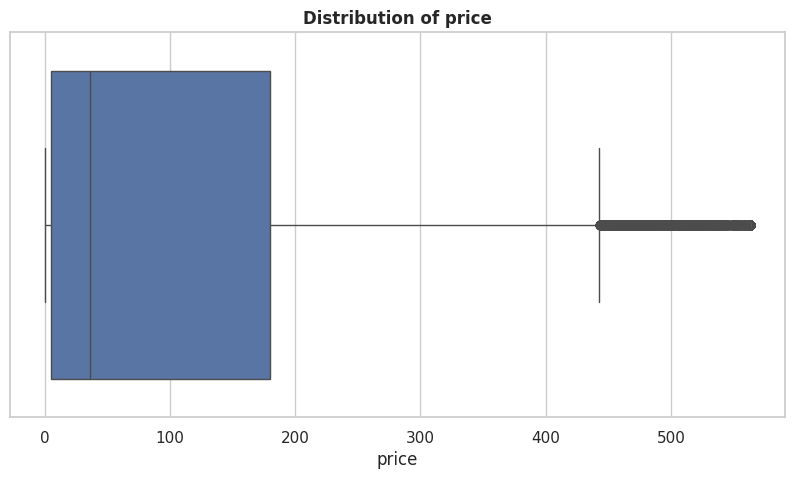

In [ ]:
#Recheck for outliers distribution
#Plot a boxplot
for col in column_to_clip:
  plt.figure(figsize= (10,5))
  sns.boxplot(data= nutrient_gap, x= col)
  plt.title(f"Distribution of {col}", fontsize= 12, fontweight= "bold")
  plt.xlabel(col)
  plt.show()

###**Feature Engineering and Feature Selection**


####**Feature Engineering**

In [ ]:
#View the column with its unique features
#Create a new dataframe


unique= pd.DataFrame({
    "Column": nutrient_gap.columns,
    "Nunique": [nutrient_gap[col].nunique() for col in nutrient_gap.columns],
    "Unique Values": [nutrient_gap[col].unique() for col in nutrient_gap.columns]
})

display(unique)

Column  Nunique  \
0             category        9   
1               region        9   
2                mnari        9   
3                pcfci        9   
4        avg_kcalories        9   
5           avg_ca(mg)        9   
6      avg_folate(mcg)        9   
7         avg_iron(mg)        9   
8       avg_niacin(mg)        9   
9   avg_riboflavin(mg)        9   
10     avg_thiamin(mg)        9   
11       avg_vita(mcg)        9   
12     avg_vitb12(mcg)        9   
13       avg_vitb6(mg)        9   
14        avg_zinc(mg)        9   
15                vcci        9   
16           maize(mt)       15   
17            rice(mt)       15   
18         sorghum(mt)        7   
19         cassava(mt)       14   
20          millet(mt)        5   
21           commodity       26   
22               price     5823   

                                        Unique Values  
0                         [0, 1, 2, 3, 5, 6, 7, 8, 9]  
1   [Ashanti, Brong Ahafo, Central, Eastern, North...  
2   [0.3577, 0.2121, 0.0324, 0.0, 0.6756, 0.9297, ...  
3   [0.7515, 0.5116, 0.6838, 0.6806, 0.222, 0.0805...  
4   [46.39, 52.76, 50.12, 51.7, 50.42, 45.19, 49.4...  
5   [77.39, 76.61, 83.57, 86.57, 58.64, 59.46, 45....  
6   [48.61, 54.96, 49.51, 52.3, 54.9, 51.64, 52.8,...  
7   [50.32, 57.41, 55.05, 59.76, 54.44, 60.77, 52....  
8   [54.35, 57.94, 60.96, 58.4, 55.05, 49.15, 51.4...  
9   [44.24, 44.45, 50.12, 50.89, 39.55, 40.14, 35....  
10  [34.76, 41.7, 39.59, 41.23, 46.5, 45.81, 46.75...  
11  [72.6, 66.58, 85.8, 83.85, 46.56, 40.31, 32.91...  
12  [72.27, 63.49, 86.73, 83.2, 41.39, 20.58, 24.9...  
13  [50.19, 58.7, 51.2, 55.06, 46.74, 39.8, 41.56,...  
14  [40.1, 46.4, 48.08, 44.27, 42.11, 41.1, 38.27,...  
15  [0.409, 0.632, 0.0266, 0.4412, 1.0, 0.592, 0.9...  
16  [35684, 76462, 108573, 166014, 66710, 213506, ...  
17  [13589, 27890, 15865, 14271, 13101, 35777, 135...  
18        [107, 0, 217, 19208, 103444, 20466, 114493]  
19  [314125, 0, 314811, 392435, 323087, 1390494, 4...  
20                  [0, 1663, 105156, 174624, 166412]  
21  [Cassava, Sorghum, Maize, Rice (Local), Yam, M...  
22  [10.31, 38.25, 11.0, 21.75, 33.63, 35.0, 76.25...

**Pattern**
- Most of the columns are numericals variables
- There are only two categorical variable in the dataset.

**Insight**
- The numerical variable will be standardalized using standardscaler
- The region column is the same as category variablee, this column will be dropped.
- One hot encoded will be applied to the commodity column.
- Further feature engineering technique will be applied to optimize model training and evaluation.
- Technique such as PCA, oversampling or undersampling, select k best and variance threshold might be explored to avoid class imbalance


In [ ]:
# Apply one-hot encoding to the 'commodity' column
nutrient_gap_encoded = pd.get_dummies(nutrient_gap, columns=['commodity'], drop_first=True)

# Convert the boolean columns to integers (0 and 1)
for col in nutrient_gap_encoded.columns:
    if nutrient_gap_encoded[col].dtype == 'bool':
        nutrient_gap_encoded[col] = nutrient_gap_encoded[col].astype(int)


# Display the first few rows of the encoded DataFrame
display(nutrient_gap_encoded.head())

category   region   mnari   pcfci  avg_kcalories  avg_ca(mg)  \
0         0  Ashanti  0.3577  0.7515          46.39       77.39   
1         0  Ashanti  0.3577  0.7515          46.39       77.39   
2         0  Ashanti  0.3577  0.7515          46.39       77.39   
3         0  Ashanti  0.3577  0.7515          46.39       77.39   
4         0  Ashanti  0.3577  0.7515          46.39       77.39   

   avg_folate(mcg)  avg_iron(mg)  avg_niacin(mg)  avg_riboflavin(mg)  ...  \
0            48.61         50.32           54.35               44.24  ...   
1            48.61         50.32           54.35               44.24  ...   
2            48.61         50.32           54.35               44.24  ...   
3            48.61         50.32           54.35               44.24  ...   
4            48.61         50.32           54.35               44.24  ...   

   commodity_Plantains (Apentu)  commodity_Rice (Imported)  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          0   
4                             0                          0   

   commodity_Rice (Local)  commodity_Rice (Paddy)  commodity_Sorghum  \
0                       0                       0                  0   
1                       0                       0                  1   
2                       0                       0                  0   
3                       0                       0                  0   
4                       1                       0                  0   

   commodity_Soybeans  commodity_Tomatoes (Local)  \
0                   0                           0   
1                   0                           0   
2                   0                           0   
3                   0                           0   
4                   0                           0   

   commodity_Tomatoes (Navrongo)  commodity_Yam  commodity_Yam (Puna)  
0                              0              0                     0  
1                              0              0                     0  
2                              0              0                     0  
3                              0              0                     0  
4                              0              0                     0  

[5 rows x 47 columns]

In [99]:
# Save the original nutrient_gap dataframe
#For dashboard purpose
nutrient_gap.to_csv('nutrient_gap.csv', index=False)

In [100]:
# Save the nutrient_gap_encoded dataframe
#For dashboad purpose
nutrient_gap_encoded.to_csv('nutrient_gap_encoded.csv', index=False)

In [ ]:
# Define the bins and labels for the nutrient gap levels
bins = [0, 0.1, 0.6, 1.0]
labels = ['Small Nutrient Gap', 'Significant Nutrient Gap', 'Severe Nutrient Gap']

# Create a new column 'nutrient_gap_level' by classifying 'mnari' based on the bins
# Using include_lowest=True to include 0 in the first bin and right=True to include the right bin edge
nutrient_gap_encoded['nutrient_gap_level'] = pd.cut(nutrient_gap_encoded['mnari'], bins=bins, labels=labels, include_lowest=True, right=True)

# Display the value counts for the new 'nutrient_gap_level' column
display(nutrient_gap_encoded['nutrient_gap_level'].value_counts())

# Display the first few rows with the new column
display(nutrient_gap_encoded[['mnari', 'nutrient_gap_level']].head())

nutrient_gap_level
Significant Nutrient Gap    16568
Severe Nutrient Gap          6687
Small Nutrient Gap           5450
Name: count, dtype: int64

mnari        nutrient_gap_level
0  0.3577  Significant Nutrient Gap
1  0.3577  Significant Nutrient Gap
2  0.3577  Significant Nutrient Gap
3  0.3577  Significant Nutrient Gap
4  0.3577  Significant Nutrient Gap

In [ ]:
# Define the mapping dictionary
nutrient_gap_mapping = {
    'Small Nutrient Gap': 0,
    'Significant Nutrient Gap': 1,
    'Severe Nutrient Gap': 2
}

# Map the 'nutrient_gap_level' column to numerical values
nutrient_gap_encoded['nutrient_gap_level_encoded'] = nutrient_gap_encoded['nutrient_gap_level'].map(nutrient_gap_mapping)

# Display the value counts for the new encoded column
display(nutrient_gap_encoded['nutrient_gap_level_encoded'].value_counts())

# Display the first few rows with the original and encoded columns
display(nutrient_gap_encoded[['nutrient_gap_level', 'nutrient_gap_level_encoded']].head())

nutrient_gap_level_encoded
1    16568
2     6687
0     5450
Name: count, dtype: int64

nutrient_gap_level nutrient_gap_level_encoded
0  Significant Nutrient Gap                          1
1  Significant Nutrient Gap                          1
2  Significant Nutrient Gap                          1
3  Significant Nutrient Gap                          1
4  Significant Nutrient Gap                          1

**Insight**
- The assigned target variable was classified into small nutrient gap, significant nutrient gap and severe nutrient gap in order to build a classification predication model. The name was changed to nutrient_gap for easy identification
- The Nutrient gap will be classified as following:
  - Small Nutrient Gap = 0
  - Significant Nutrient Gap = 1
  - Severe Nutrient Gap = 2

**Recommendation**
- Other feature engineering such as undersampling will be applied during splitting of dataset to avoid data leakage


####**Feature Selection**

In [ ]:
#View the dataset
nutrient_gap_encoded.head()

category   region   mnari   pcfci  avg_kcalories  avg_ca(mg)  \
0         0  Ashanti  0.3577  0.7515          46.39       77.39   
1         0  Ashanti  0.3577  0.7515          46.39       77.39   
2         0  Ashanti  0.3577  0.7515          46.39       77.39   
3         0  Ashanti  0.3577  0.7515          46.39       77.39   
4         0  Ashanti  0.3577  0.7515          46.39       77.39   

   avg_folate(mcg)  avg_iron(mg)  avg_niacin(mg)  avg_riboflavin(mg)  ...  \
0            48.61         50.32           54.35               44.24  ...   
1            48.61         50.32           54.35               44.24  ...   
2            48.61         50.32           54.35               44.24  ...   
3            48.61         50.32           54.35               44.24  ...   
4            48.61         50.32           54.35               44.24  ...   

   commodity_Rice (Local)  commodity_Rice (Paddy)  commodity_Sorghum  \
0                       0                       0                  0   
1                       0                       0                  1   
2                       0                       0                  0   
3                       0                       0                  0   
4                       1                       0                  0   

   commodity_Soybeans  commodity_Tomatoes (Local)  \
0                   0                           0   
1                   0                           0   
2                   0                           0   
3                   0                           0   
4                   0                           0   

   commodity_Tomatoes (Navrongo)  commodity_Yam  commodity_Yam (Puna)  \
0                              0              0                     0   
1                              0              0                     0   
2                              0              0                     0   
3                              0              0                     0   
4                              0              0                     0   

         nutrient_gap_level  nutrient_gap_level_encoded  
0  Significant Nutrient Gap                           1  
1  Significant Nutrient Gap                           1  
2  Significant Nutrient Gap                           1  
3  Significant Nutrient Gap                           1  
4  Significant Nutrient Gap                           1  

[5 rows x 49 columns]

In [ ]:
#View the shape
print("Total rows = {} and Total columns = {}". format(nutrient_gap_encoded.shape[0], nutrient_gap_encoded.shape[1]))

Total rows = 28705 and Total columns = 49


In [ ]:
#View the info
nutrient_gap_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28705 entries, 0 to 40816
Data columns (total 49 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   category                          28705 non-null  int64   
 1   region                            28705 non-null  object  
 2   mnari                             28705 non-null  float64 
 3   pcfci                             28705 non-null  float64 
 4   avg_kcalories                     28705 non-null  float64 
 5   avg_ca(mg)                        28705 non-null  float64 
 6   avg_folate(mcg)                   28705 non-null  float64 
 7   avg_iron(mg)                      28705 non-null  float64 
 8   avg_niacin(mg)                    28705 non-null  float64 
 9   avg_riboflavin(mg)                28705 non-null  float64 
 10  avg_thiamin(mg)                   28705 non-null  float64 
 11  avg_vita(mcg)                     28705 non-null  float64 


**Pattern**
- Region and Category contain the information for Ghana regions
- Nutrient_gap_level and mnari contain the same information for nutrient_gap_level_encoded
- There is a Total rows of 28705 and Total columns of 49

**Insight**
- The region column, nutrient_gap_leve and mnari will be dropped to improve model performance
- The datatype of nutrient_gap_level_encoded will be changed to integer to enable the model train well.
- Missing values and duplicates will be checked to improve data intergrity and consistencies.


In [ ]:
#Dropping of redundant column

column_to_drop= ["region", "mnari","nutrient_gap_level"]

#Drop the columns
for col in column_to_drop:
  nutrient_gap_encoded.drop(columns= col, inplace= True)


#Display the info
nutrient_gap_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28705 entries, 0 to 40816
Data columns (total 46 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   category                          28705 non-null  int64   
 1   pcfci                             28705 non-null  float64 
 2   avg_kcalories                     28705 non-null  float64 
 3   avg_ca(mg)                        28705 non-null  float64 
 4   avg_folate(mcg)                   28705 non-null  float64 
 5   avg_iron(mg)                      28705 non-null  float64 
 6   avg_niacin(mg)                    28705 non-null  float64 
 7   avg_riboflavin(mg)                28705 non-null  float64 
 8   avg_thiamin(mg)                   28705 non-null  float64 
 9   avg_vita(mcg)                     28705 non-null  float64 
 10  avg_vitb12(mcg)                   28705 non-null  float64 
 11  avg_vitb6(mg)                     28705 non-null  float64 


In [ ]:
#Change the nutrient_gap_level_encoded datatype to int
nutrient_gap_encoded["nutrient_gap_level_encoded"]= nutrient_gap_encoded["nutrient_gap_level_encoded"].astype(int)

In [ ]:
#View info
nutrient_gap_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28705 entries, 0 to 40816
Data columns (total 46 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   category                          28705 non-null  int64  
 1   pcfci                             28705 non-null  float64
 2   avg_kcalories                     28705 non-null  float64
 3   avg_ca(mg)                        28705 non-null  float64
 4   avg_folate(mcg)                   28705 non-null  float64
 5   avg_iron(mg)                      28705 non-null  float64
 6   avg_niacin(mg)                    28705 non-null  float64
 7   avg_riboflavin(mg)                28705 non-null  float64
 8   avg_thiamin(mg)                   28705 non-null  float64
 9   avg_vita(mcg)                     28705 non-null  float64
 10  avg_vitb12(mcg)                   28705 non-null  float64
 11  avg_vitb6(mg)                     28705 non-null  float64
 12  avg_zinc(

In [ ]:
#Check for missing values
nutrient_gap_encoded.isna().sum()

category                            0
pcfci                               0
avg_kcalories                       0
avg_ca(mg)                          0
avg_folate(mcg)                     0
avg_iron(mg)                        0
avg_niacin(mg)                      0
avg_riboflavin(mg)                  0
avg_thiamin(mg)                     0
avg_vita(mcg)                       0
avg_vitb12(mcg)                     0
avg_vitb6(mg)                       0
avg_zinc(mg)                        0
vcci                                0
maize(mt)                           0
rice(mt)                            0
sorghum(mt)                         0
cassava(mt)                         0
millet(mt)                          0
price                               0
commodity_Cowpeas                   0
commodity_Cowpeas (White)           0
commodity_Eggplants                 0
commodity_Eggs                      0
commodity_Fish (Mackerel, Fresh)    0
commodity_Gari                      0
commodity_Maize                     0
commodity_Maize (Yellow)            0
commodity_Meat (Chicken)            0
commodity_Meat (Chicken, Local)     0
commodity_Millet                    0
commodity_Onions                    0
commodity_Peppers (Dried)           0
commodity_Peppers (Fresh)           0
commodity_Plantains (Apem)          0
commodity_Plantains (Apentu)        0
commodity_Rice (Imported)           0
commodity_Rice (Local)              0
commodity_Rice (Paddy)              0
commodity_Sorghum                   0
commodity_Soybeans                  0
commodity_Tomatoes (Local)          0
commodity_Tomatoes (Navrongo)       0
commodity_Yam                       0
commodity_Yam (Puna)                0
nutrient_gap_level_encoded          0
dtype: int64

In [ ]:
#Check for duplicates
nutrient_gap_encoded.duplicated().sum()

np.int64(1185)

In [ ]:
#Drop duplicates
nutrient_gap_encoded.drop_duplicates(inplace= True)
print("There is {} duplicates".format(nutrient_gap_encoded.duplicated().sum()))

There is 0 duplicates


In [ ]:
#View the info
nutrient_gap_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27520 entries, 0 to 40816
Data columns (total 46 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   category                          27520 non-null  int64  
 1   pcfci                             27520 non-null  float64
 2   avg_kcalories                     27520 non-null  float64
 3   avg_ca(mg)                        27520 non-null  float64
 4   avg_folate(mcg)                   27520 non-null  float64
 5   avg_iron(mg)                      27520 non-null  float64
 6   avg_niacin(mg)                    27520 non-null  float64
 7   avg_riboflavin(mg)                27520 non-null  float64
 8   avg_thiamin(mg)                   27520 non-null  float64
 9   avg_vita(mcg)                     27520 non-null  float64
 10  avg_vitb12(mcg)                   27520 non-null  float64
 11  avg_vitb6(mg)                     27520 non-null  float64
 12  avg_zinc(

In [ ]:
#View the sample
nutrient_gap_encoded.sample(5)

category   pcfci  avg_kcalories  avg_ca(mg)  avg_folate(mcg)  \
38878         9  0.5444          47.78       77.96            42.91   
7550          1  0.5116          52.76       76.61            54.96   
31756         6  0.0805          45.19       59.46            51.64   
3431          0  0.7515          46.39       77.39            48.61   
17210         1  0.5116          52.76       76.61            54.96   

       avg_iron(mg)  avg_niacin(mg)  avg_riboflavin(mg)  avg_thiamin(mg)  \
38878         53.55           56.17               49.56            35.37   
7550          57.41           57.94               44.45            41.70   
31756         60.77           49.15               40.14            45.81   
3431          50.32           54.35               44.24            34.76   
17210         57.41           57.94               44.45            41.70   

       avg_vita(mcg)  ...  commodity_Rice (Imported)  commodity_Rice (Local)  \
38878          76.32  ...                          0                       0   
7550           66.58  ...                          0                       0   
31756          40.31  ...                          0                       0   
3431           72.60  ...                          0                       0   
17210          66.58  ...                          0                       0   

       commodity_Rice (Paddy)  commodity_Sorghum  commodity_Soybeans  \
38878                       0                  0                   0   
7550                        0                  0                   1   
31756                       0                  0                   0   
3431                        0                  0                   0   
17210                       0                  0                   0   

       commodity_Tomatoes (Local)  commodity_Tomatoes (Navrongo)  \
38878                           0                              0   
7550                            0                              0   
31756                           0                              0   
3431                            0                              0   
17210                           0                              0   

       commodity_Yam  commodity_Yam (Puna)  nutrient_gap_level_encoded  
38878              0                     0                           1  
7550               0                     0                           1  
31756              0                     0                           2  
3431               0                     0                           1  
17210              0                     0                           1  

[5 rows x 46 columns]

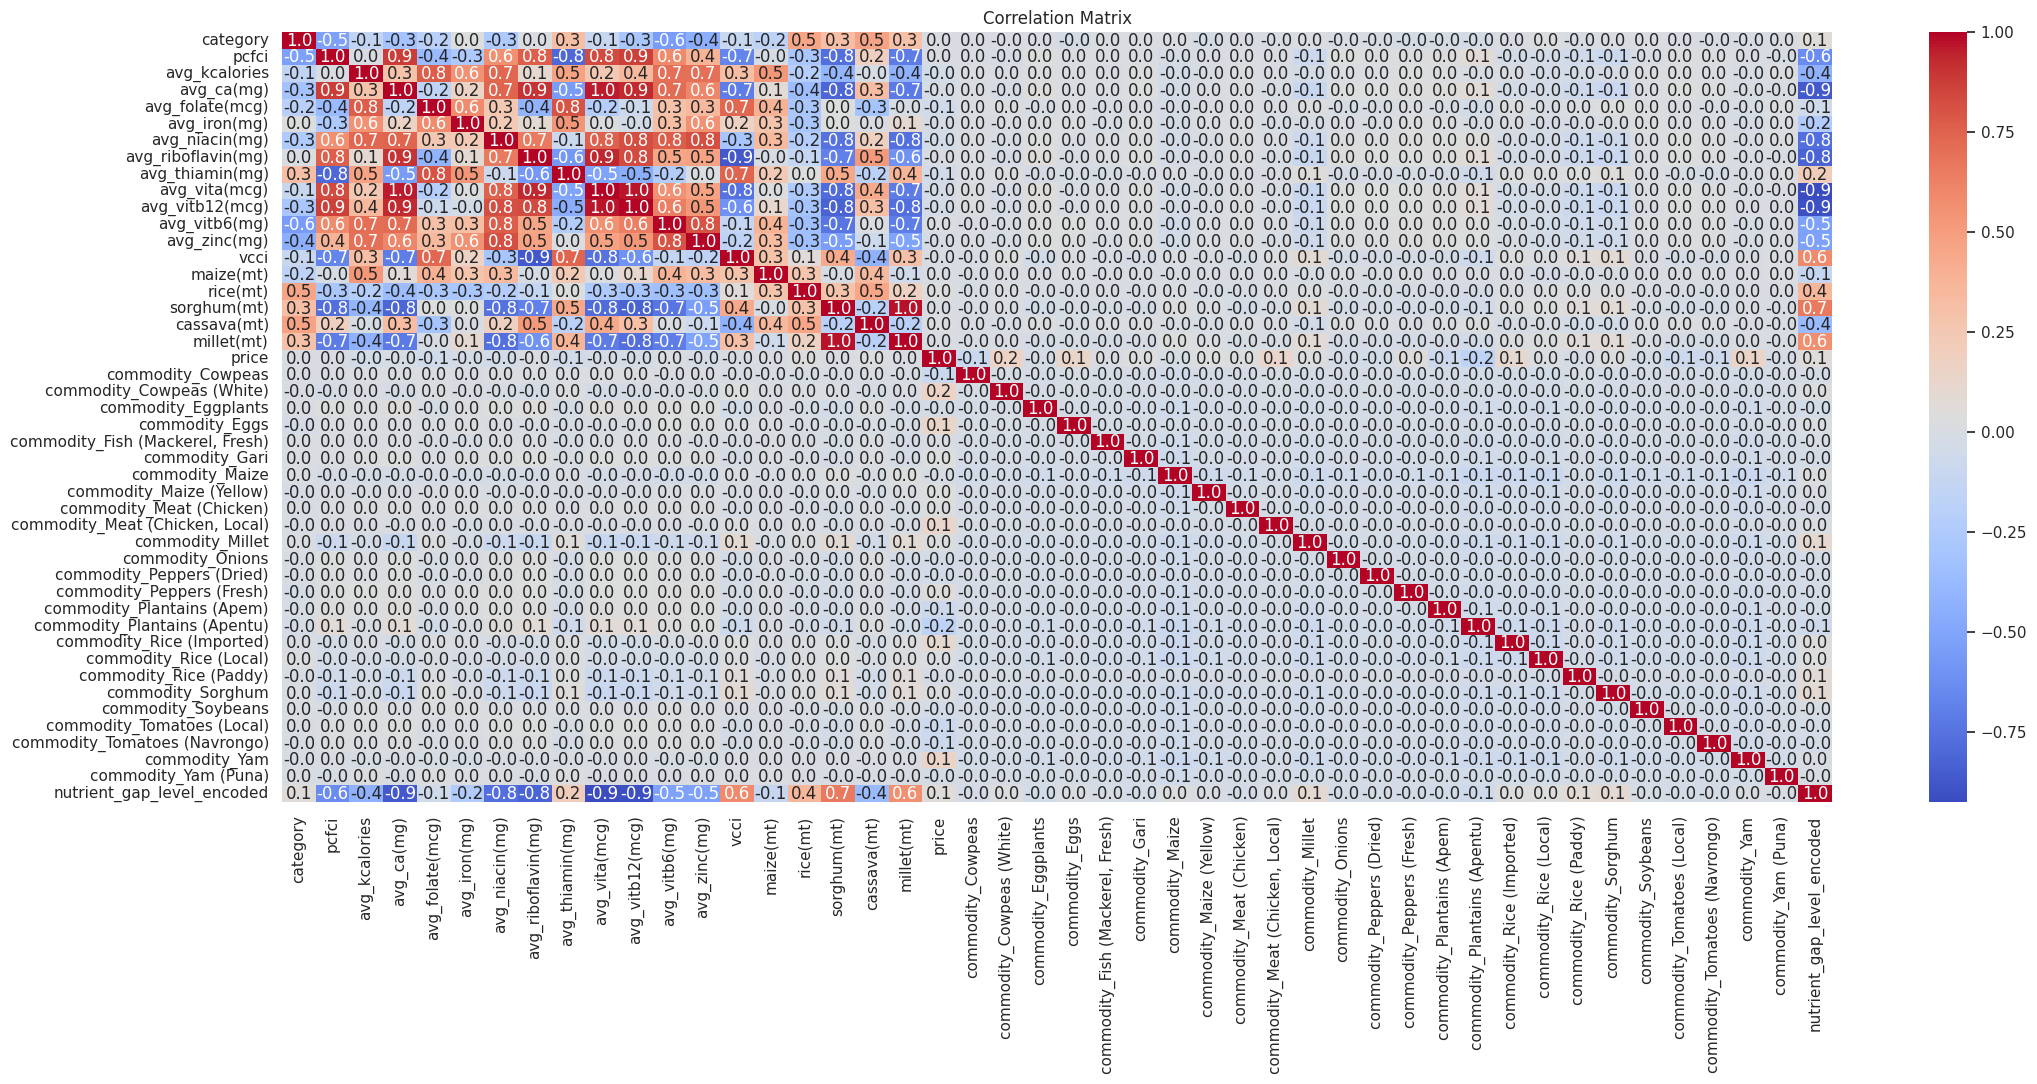

In [ ]:
#Plot a correlation matrix to see the relationship
corr_matrix = nutrient_gap_encoded.corr()

plt.figure(figsize=(25, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Matrix')
plt.show()

##**Step 6: Model Development**

###**Splitting of DataSet**

In [ ]:
#Separate into features and target
X= nutrient_gap_encoded.drop("nutrient_gap_level_encoded", axis= 1)
y= nutrient_gap_encoded["nutrient_gap_level_encoded"]

In [ ]:
#Split the dataset into Train and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.1, random_state= 42, stratify= y)

#Check the shape
print("X_train shape = {} and y_train shape = {}".format(X_train.shape, y_train.shape))
print("X_test shape = {} and y_test shape = {}".format(X_test.shape, y_test.shape))


X_train shape = (24768, 45) and y_train shape = (24768,)
X_test shape = (2752, 45) and y_test shape = (2752,)


###**Feature Engineering and Feature Selection on both Train and Test set**

In [ ]:
#Separate the dataset into number and cate
numerical_col= X.select_dtypes(include= np.number)
categorical_col= X.select_dtypes(exclude= np.number)

# Print the number of numerical and categorical columns
print(f"Number of numerical columns: {numerical_col.shape[1]}")
print(f"Number of categorical columns: {categorical_col.shape[1]}")

Number of numerical columns: 45
Number of categorical columns: 0


####**Using Pipeline**

In [ ]:
#Import the necessary librabries for feature engineering, model training and evaluation
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer

**Insight**
- Since all the features are number, feature engineering via pipeline will be done only on the numerical columns for both train and test set

In [ ]:
num_pipeline = Pipeline([
    ("scalar", StandardScaler()),
    ("variance", VarianceThreshold(threshold= 0.1)),
    ("selector", SelectKBest(score_func= f_classif))

])

#Display the result
print("Pipeline Used")
display(num_pipeline)

Pipeline Used


Pipeline(steps=[('scalar', StandardScaler()),
                ('variance', VarianceThreshold(threshold=0.1)),
                ('selector', SelectKBest())])

####**For Train Dataset**

In [ ]:
#Applying pipeline on the train variable
X_train_final= num_pipeline.fit_transform(X_train, y_train) #add y_train for the feature selection


####**For Test Dataset**

In [ ]:
X_test_final= num_pipeline.transform(X_test) #Only use transform to avoid data leakage

In [ ]:
#Print the final dataset for model training and evaluation
print(f"Shape of X_train_final: {X_train_final.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test_final: {X_test_final.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train_final: (24768, 10)
Shape of y_train: (24768,)
Shape of X_test_final: (2752, 10)
Shape of y_test: (2752,)


###**Model Training and Evaluation**

In [ ]:
#Import the necessary librabries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, f1_score
from sklearn.model_selection import GridSearchCV
import joblib


####**1. Logistic Regression**

#####**Model Training**

In [ ]:
#Initialize the training
log_reg = LogisticRegression(random_state= 42)

#Fit the model
log_reg.fit(X_train_final, y_train)

LogisticRegression(random_state=42)

In [ ]:
#Make prediction
y_pred_log_reg= log_reg.predict(X_test_final)

#print the prediction
print(y_pred_log_reg)

[0 1 2 ... 2 0 0]


In [ ]:
#Create the dataframe toa see the result
result= pd.DataFrame({
    "Actual": y_test,
    "LogisticRegression": y_pred_log_reg
})

#Display the result
result.head()

Actual  LogisticRegression
22120       0                   0
1512        1                   1
24358       2                   2
8658        1                   1
6791        1                   1

#####**Model Evaluation**

In [ ]:
#Print Metric Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg)}")
print(f"F1 Score: {f1_score(y_test, y_pred_log_reg, average= 'weighted')}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_log_reg)}")

Accuracy: 1.0
F1 Score: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       523
           1       1.00      1.00      1.00      1577
           2       1.00      1.00      1.00       652

    accuracy                           1.00      2752
   macro avg       1.00      1.00      1.00      2752
weighted avg       1.00      1.00      1.00      2752



In [ ]:
# To convert there is no overfitting or underfitting
#Make predictions on the training data
y_pred_train_log_reg = log_reg.predict(X_train_final)

# Calculate and print performance metrics on the training data
print("Performance on Training Data:")
print(f"Accuracy: {accuracy_score(y_train, y_pred_train_log_reg)}")
print(f"F1 Score: {f1_score(y_train, y_pred_train_log_reg, average='weighted')}")

print("\nPerformance on Test Data:")
# The performance on the test data was calculated in a previous cell
# You can refer back to its output or recalculate it here if needed.
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg)}")
print(f"F1 Score: {f1_score(y_test, y_pred_log_reg, average='weighted')}")

Performance on Training Data:
Accuracy: 1.0
F1 Score: 1.0

Performance on Test Data:
Accuracy: 1.0
F1 Score: 1.0


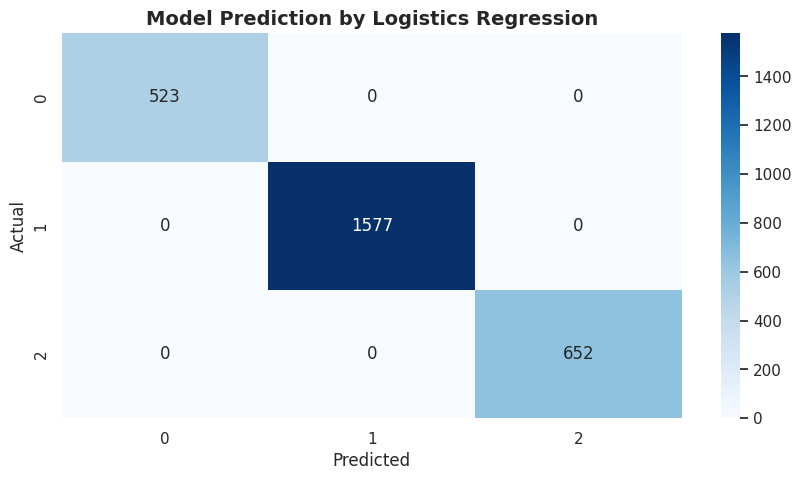

In [ ]:
#Plot a confusion matrix
cm= confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize= (10,5))
sns.heatmap(cm, annot= True, fmt= "d", cmap= "Blues")
plt.title("Model Prediction by Logistics Regression", fontsize= 14, fontweight= "bold")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

####**2. Decision Tree Classifier**

#####**Model Training**


In [ ]:
dec_tree = DecisionTreeClassifier(random_state= 42)

#Fit the model
dec_tree.fit(X_train_final, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
#Make Prediction
y_pred_dec_tree= dec_tree.predict(X_test_final)

#Print the prediction
print(y_pred_dec_tree)

[0 1 2 ... 2 0 0]


In [ ]:
#Compare with the actual result
result["DecisionTree"]= y_pred_dec_tree

#display the result
result.head()

Actual  LogisticRegression  DecisionTree
22120       0                   0             0
1512        1                   1             1
24358       2                   2             2
8658        1                   1             1
6791        1                   1             1

####**Model Evaluation**


In [ ]:
#Print the metrics evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred_dec_tree)}")
print(classification_report(y_test, y_pred_dec_tree))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       523
           1       1.00      1.00      1.00      1577
           2       1.00      1.00      1.00       652

    accuracy                           1.00      2752
   macro avg       1.00      1.00      1.00      2752
weighted avg       1.00      1.00      1.00      2752



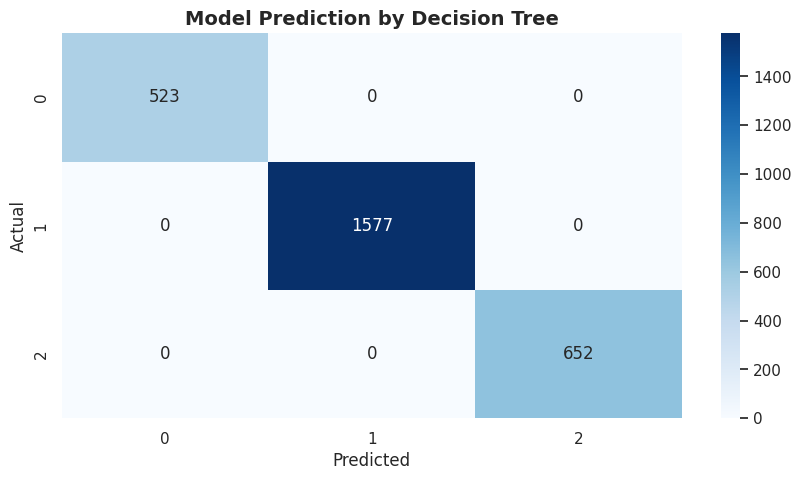

In [ ]:
#Plot confusion matrix
cm= confusion_matrix(y_test, y_pred_dec_tree)
plt.figure(figsize= (10,5))
sns.heatmap(cm, annot= True, fmt= "d", cmap= "Blues")
plt.title("Model Prediction by Decision Tree", fontsize= 14, fontweight= "bold")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

####**3. Random Forest Classifier**


#####**Model Training**


In [ ]:
#Initialize
rand_forest= RandomForestClassifier(random_state= 42)

#Fit the model
rand_forest.fit(X_train_final, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
#Make Prediction
y_pred_rand_forest= rand_forest.predict(X_test_final)

#Print the prediction
print(y_pred_rand_forest)

[0 1 2 ... 2 0 0]


In [ ]:
#Compare the result
result["RandomForest"]= y_pred_rand_forest

#Display the result
result.head()

Actual  LogisticRegression  DecisionTree  RandomForest
22120       0                   0             0             0
1512        1                   1             1             1
24358       2                   2             2             2
8658        1                   1             1             1
6791        1                   1             1             1

####**Model Evaluation**

In [ ]:
#Print the metrics evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred_rand_forest)}")
print(classification_report(y_test, y_pred_rand_forest))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       523
           1       1.00      1.00      1.00      1577
           2       1.00      1.00      1.00       652

    accuracy                           1.00      2752
   macro avg       1.00      1.00      1.00      2752
weighted avg       1.00      1.00      1.00      2752



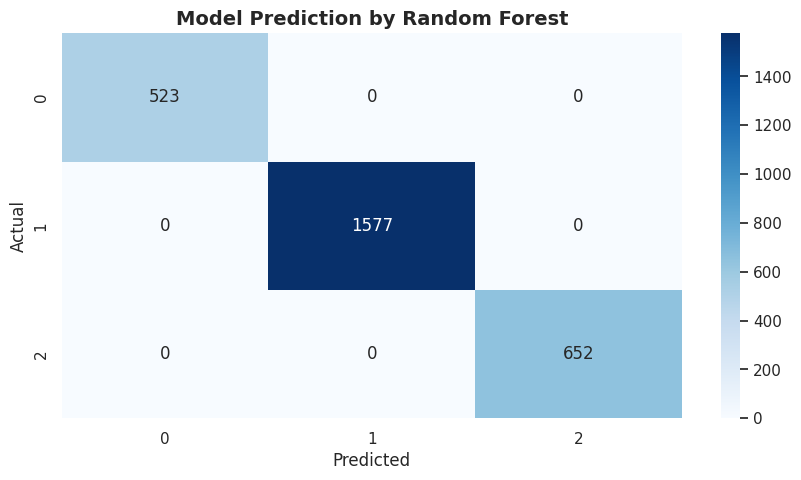

In [ ]:
#Plot a confusion matrix
cm= confusion_matrix(y_test, y_pred_rand_forest)
plt.figure(figsize= (10,5))
sns.heatmap(cm, annot= True, fmt= "d", cmap= "Blues")
plt.title("Model Prediction by Random Forest", fontsize= 14, fontweight= "bold")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Pattern**
- The model perform well achieved an accuracy of 100% and 100% F1 Score showing its ability to recall and precision.
- The test dataset was checked to confirm if there was any data leakage.
- The model was built using logistic regression, decision tree and random forest which they all performed all.

**Insight**
- The overall performance of the model could be as a result of the higly correlation between the features and target variables.
- Since the baseline model perform very well, there will less need of hypertuning parameter and cross validation using GridSearch Cv

**Recommendation**
- Further research should be done to capture less correlation features that have impact on the nutrient gap.




###**Saving the dataset**

**Insight**
- Since the model was trained across simple model algorithmn to a more robust model algorithmn. Random forest classifier will be saved for future capture of any less correlation features.

In [ ]:
#Save the model of random forest
joblib.dump(rand_forest, "nutrient_gap_model.pkl")

['nutrient_gap_model.pkl']

###**Checking the Feature Importance**


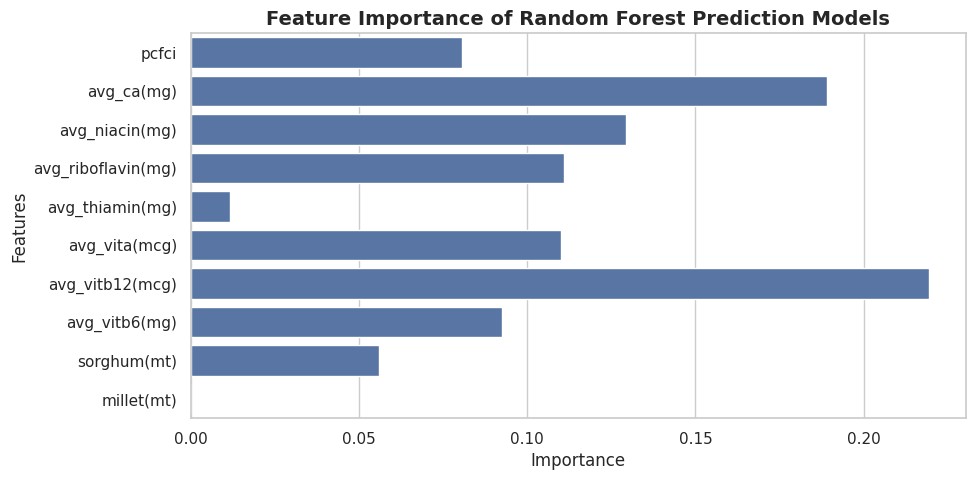

In [ ]:
#Check the feature importance
feature_importances = rand_forest.feature_importances_

#Get the feature name after SelectKBest from the pipeline(original name of column)
selected_features= X.columns[num_pipeline.named_steps["selector"].get_support()]

#Plot a graph
plt.figure(figsize= (10,5))
sns.barplot(x= feature_importances, y= selected_features)
plt.title("Feature Importance of Random Forest Prediction Models", fontsize= 14, fontweight= "bold")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()



**Pattern**
- Avg_vitB12 is the highest followed by avg_ca and avg_niacin
- The lowest is millet, avg_thiamin and sorghum
- The moderate is pcfci and vita

**Insight**
- Low Proteinous food and highly rich fibre food tend to be the major cause of severe nutrient gap in the affected area as they tend to eat more of carbohydrates foods.

**Recommndation**
- The production of highly rich foods such as sorghum and millet should be encouraged as these food contain more nutrition than more carbohydrate meals consume in the affected area.
- Diverification in agriculture such as poultry, and food fortification such as vita in cassava should be produced to mop these severe nutrient gap.
- The affected region should be educated and enlighten on the importance of balanced diets in order to have a more balanced consumption nutrient adequency.

## Key Summaries and Recommendations

Based on the exploratory data analysis and initial model development, the following key summaries and recommendations have been identified:

### Key Summaries:

*   **Data Integration and Preparation:** Data from multiple sources (AGWAA API, FS-COR, FAOSTAT/HDX) for Ghana in 2022 were successfully loaded, merged, cleaned, and preprocessed for analysis and modeling. This included handling missing values, duplicates, and outliers.
*   **Nutrient Gap Distribution:** The Mean Nutrient Adequacy Ratio Index (MNARI), used as the target variable, shows regional variations in nutrient adequacy. Some regions, particularly Eastern and Central, exhibit lower MNARI values (higher nutrient gaps), while Upper West and Upper East show higher MNARI values (lower nutrient gaps).
*   **Commodity Consumption Patterns:** Staple crops like Maize, Yam, and Plantains are the most consumed commodities, while highly nutritious options such as Rice (Paddy), Meat (Chicken, Local), and Cowpeas have lower consumption rates.
*   **Price and Nutrient Gaps:** Commodities with higher nutritional value tend to have higher prices, potentially limiting access for vulnerable populations and contributing to nutrient gaps.
*   **Climate Change Vulnerability:** Regions with higher vulnerability to climate change, such as Northern and Upper West, appear to be associated with certain nutrient gap conditions. Climate conditions may impact agricultural production and food availability.
*   **Feature Importance:** Key features influencing nutrient gap levels include Average Vitamin B12, Average Calcium, and Average Niacin. This highlights the importance of micronutrient availability.
*   **Model Performance:** The initial classification models (Logistic Regression, Decision Tree, Random Forest) achieved high accuracy in predicting nutrient gap levels, suggesting that the selected features are strong indicators.

### Recommendations:

*   **Targeted Interventions:** Focus nutrition policies and interventions on regions identified with significant and severe nutrient gaps, such as Eastern and Central.
*   **Price Regulation and Accessibility:** Implement policies to regulate the prices of nutrient-dense foods to improve affordability and access for vulnerable populations. Consider subsidies or price controls for essential nutritious commodities.
*   **Promote Diversified and Climate-Resilient Agriculture:** Encourage the production of a wider variety of nutritious foods, including protein sources and micronutrient-rich crops like sorghum and millet. Invest in climate-resilient agricultural practices in vulnerable regions to ensure consistent food supply.
*   **Enhance Nutritional Education:** Develop and implement comprehensive nutrition education programs in schools and communities to raise awareness about balanced diets and the importance of consuming a variety of nutrient-rich foods.
*   **Support Food Fortification:** Expand and support food fortification programs for commonly consumed staples to address widespread micronutrient deficiencies.
*   **Further Research on Price Drivers:** Investigate the underlying causes of price spikes in nutritious commodities, including the impact of climate change, market dynamics, and supply chain issues.
*   **Monitor and Evaluate:** Continuously monitor nutrient gap levels and evaluate the impact of implemented interventions to adapt strategies as needed.